# imports

In [1]:
%load_ext autoreload
%autoreload 2
%aimport
%matplotlib inline

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
import pickle
import numpy as np
import face_recognition
from tqdm import tqdm_notebook as tqdm

from scipy.spatial.distance import cdist

In [11]:
from pathlib import Path
data_path = Path('data')
posters_folder = data_path / "posters"
actors_dir = data_path / 'actors'
movies_data_dir = data_path / 'movies'
numberOfTopActors = 5
tempImgPath = Path('temp.jpg')
reduced_height = 3000

# actors_dir.mkdir(exist_ok=True)
# faces_dir.mkdir(exist_ok=True)

In [4]:
# ! pip install face_recognition 
# ! pip install keras-vggface
# ! pip install IMDbPY

from bs4 import BeautifulSoup as BSHTML
import requests
from PIL import Image
from io import BytesIO
import imdb

import pandas as pd
from fastai.vision import *
import cv2

ia = imdb.IMDb()


ModuleNotFoundError: No module named 'fastai'

# Ethnicity

In [4]:
def ethnicityMain(movieTitle, posterPath):

  learn = load_learner('/content/gdrive/My Drive/עבודות/תואר שני/עבודת גמר','export5.pkl')
  classes = learn.data.classes
  result = {}

  facesPaths = getFacesPaths(movieTitle, posterPath)

  for i in range(0, len(facesPaths)):
    facePath = f'{faces_dir}/{movieTitle}-{i}.jpg'
    img = open_image(facePath)
    pred = learn.predict(img)
    result[i] = classes[int(pred[0])]
    print(f'{i} - {classes[int(pred[0])]}')

  return result

In [5]:
from PIL import Image

def getFacesPaths(movieTitle, posterPath):
  facesPaths = []
  posterImg = loadAndReduceImage(posterPath)
  height, width, d = posterImg.shape
  padding = 100
  index = 0

  facesLocations = face_recognition.face_locations(posterImg, model='cnn')
  print('len of locations-ethnicity', len(facesLocations))
  for location in facesLocations:
    (top, right, bottom, left) = padImg(location, padding, height, width)

    faceArray = posterImg[top:bottom, left:right]
    faceImg = Image.fromarray(faceArray)
    facePath = f'{faces_dir}/{movieTitle}-{index}.jpg'

    facesPaths.append(facePath)
    faceImg.save(facePath)

    index+=1

  return facesPaths

def padImg(location, padding, height, width):
  (top, right, bottom, left) = location

  top = top-padding if top-padding > 0 else top
  right = right+padding if right+padding < width else right
  left = left-padding if left-padding > 0 else left
  bottom = bottom+padding if bottom+padding < 0 else bottom

  return (top, right, bottom, left)


# Face Recognition

In [1]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.__version__

'2.1.0'

In [7]:
!ls data/posters/100\ Rifles | head -20

36FO7mjwHOFahC6bXeola2PgreP.jpg
5XxvPozthKi7n1s4Q85h3hJrnON.jpg
5kdOMeAGfc5Nni6J8hc9Ac8CwNS.jpg
5uZQIL7XUM1PQXNX2WNK5M42KZY.jpg
AcmT3hnBggDgqSaAcK4ktcSfzAG.jpg
awQ7Bh8fFQbRo31N1r3oB6FQ8oW.jpg
bk1uKw2p6KZxHaBNyyQPFwMIz8A.jpg
eff6TwkyAvo4fKhPBXAQSfhn8Ei.jpg
j5sAXT7v63DBwzuT6iIfMCjCpEt.jpg
metadata.json
o5gFw65DPtkl23krmt4UfmkRyEh.jpg
tt0063970-imdbpy.jpg
z2OWZOGkiaPkyxNCaQizyKHgbkk.jpg


In [23]:
from PIL import Image
img =Image.open("data/posters/100 Rifles/5XxvPozthKi7n1s4Q85h3hJrnON.jpg")


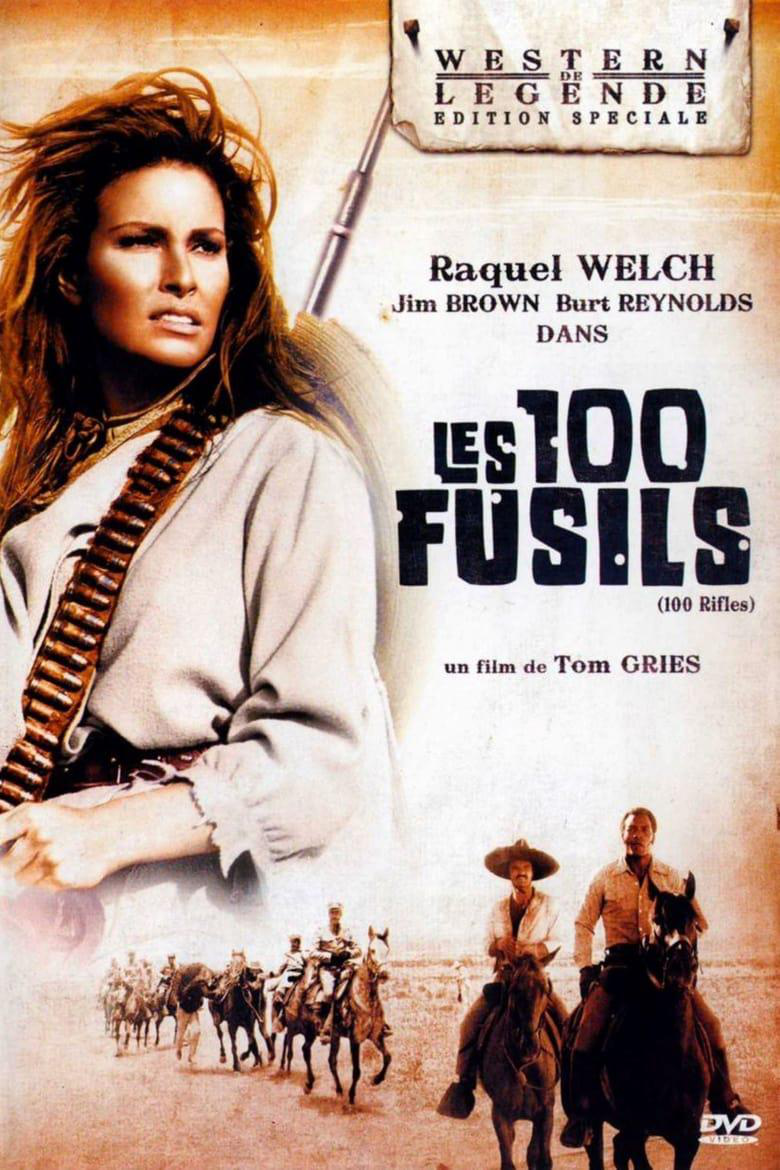

In [24]:
img

In [18]:
import numpy as np

In [434]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def view_dataset_sample(img,boxes):
    '''
    Code taken from Peter's Kernel 
    https://www.kaggle.com/pestipeti/pytorch-starter-fasterrcnn-train
    '''


    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    for box in boxes:
          # box = box[0].to_numpy()
          # print([0])
          color = (0,0,220) #if p>0.5 else (0,0,0)
          rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
          ax.add_patch(rect)
    ax.set_axis_off()
    ax.imshow(img)

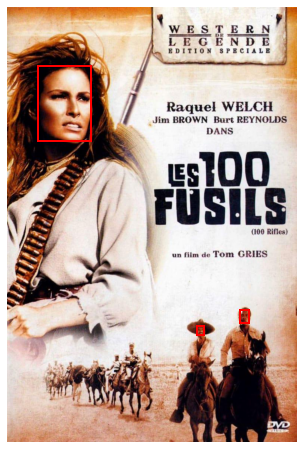

In [25]:
view_dataset_sample(img, det)

In [479]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def view_dataset_sample(img,boxes):
    '''
    Code taken from Peter's Kernel 
    https://www.kaggle.com/pestipeti/pytorch-starter-fasterrcnn-train
    '''


    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    for box in boxes:
          # box = box[0].to_numpy()
          # print([0])
          color = (0,0,220) #if p>0.5 else (0,0,0)
#             t r b l
          rect = patches.Rectangle((box[3],box[0]),box[1]-box[3],box[2]-box[0],linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
          ax.add_patch(rect)
    ax.set_axis_off()
    ax.imshow(img)

In [480]:
def xy_to_lrtd(box):
    return (box[1],box[0]+box[3],box[1]+box[2],box[0])

In [409]:
from face_recognition.api import _rect_to_css, _trim_css_to_bounds, _css_to_rect
# _trim_css_to_bounds(_rect_to_css(face), input_img.shape)

In [403]:
def lrtd_to_xy(box):
    return (box[3],box[0],box[2]-box[0], box[1]-box[3])

In [404]:
[lrtd_to_xy(b) for b in df.iloc[0]["faces"]]

[(405, 575, 61, 82),
 (597, 583, 87, 112),
 (445, 48, 33, 58),
 (563, 37, 21, 27),
 (170, 741, 36, 42),
 (311, 774, 25, 33),
 (516, 189, 18, 22)]

In [405]:
poster_path = posters_folder/f'{df.iloc[0]["movie"]}{df.iloc[0]["file_path"]}'


In [440]:
def mtcnn_to_cc(line):
    left,top, width, height = line
    bottom = top +height
    right = left+width
    return (top, right, bottom, left)

In [ ]:
view_dataset_sample

In [ ]:
mtcnn_vis(poster_path, detector.detect_faces(img))

In [436]:
??view_dataset_sample

Signature: view_dataset_sample(img, boxes)
Source:   
def view_dataset_sample(img,boxes):
    '''
    Code taken from Peter's Kernel 
    https://www.kaggle.com/pestipeti/pytorch-starter-fasterrcnn-train
    '''


    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    for box in boxes:
          # box = box[0].to_numpy()
          # print([0])
          color = (0,0,220) #if p>0.5 else (0,0,0)
          rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
          ax.add_patch(rect)
    ax.set_axis_off()
    ax.imshow(img)
File:      ~/Projects/PosterAnalyzer/<ipython-input-434-4c5f045644b7>
Type:      function


In [5]:
from mtcnn import MTCNN

detector = MTCNN()



Using TensorFlow backend.


In [55]:
with Path("posters_dups.pkl").open("rb") as f:
    df = pickle.load(f)

In [60]:
df = df[df["dups"]==False]

In [13]:
from PIL import Image
def load_and_reduce_image(img_path):
    img = np.asarray(Image.open(img_path).convert('RGB'))
    if (img.shape[0] < reduced_height):
        return img

    rate = reduced_height / img.shape[0]

    height = int(round((rate * img.shape[0])))
    width = int(round((rate * img.shape[1])))
    dim = (width, height)

    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    return img


In [94]:
df["faces"] =  ""

/home/kagandi/.conda/envs/posters/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
import sendgrid
sendgrid.__version__

'6.4.7'

In [107]:
!pip list | grep sendgrid

sendgrid                6.4.7               


In [7]:
from sendgrid.helpers.mail import Mail, Email, Content
from sendgrid import SendGridAPIClient
import traceback


def send_email(send_to, subject, mail_content, mail_html=None, reply_to="dimakagan15@gmail.com", attachments=False):
    try:
        sg = SendGridAPIClient(api_key='')
        message = Mail(
        from_email="dimakagan15@gmail.com",
        to_emails=send_to,
        subject=subject,
        html_content=mail_content)
        response = sg.send(message)
    except:
        print( traceback.format_exc())
        return False
    return True



In [ ]:
from tqdm import tqdm_notebook as tqdm
import traceback
temp_df = df[df["faces"]==""]
try:
    for row_num, (i, poster_df) in enumerate(tqdm(temp_df.iterrows(), total=len(temp_df))):
        poster_path = posters_folder/f'{poster_df["movie"]}{poster_df["file_path"]}'
        poster_image = load_and_reduce_image(poster_path)
        df.at[i,'faces'] = face_detection(poster_image)
        if row_num % 1000 == 0:
            df.to_pickle("posters_face.pkl") 
            send_email("morxl1601@gmail.com", "Learning Status", f'{row_num}/{len(df[df["faces"]==""])}') 
except Exception as e:
    send_email("dimakagan15@gmail.com", "Code Crashed", traceback.format_exc()) 
    send_email("morxl1601@gmail.com", "Code Crashed", traceback.format_exc()) 
    
df.to_pickle("posters_face.pkl") 
send_email("dimakagan15@gmail.com", "Code Finished", ":)") 
send_email("morxl1601@gmail.com", "Code Finished", ":)")  

In [144]:
df[df["faces"].apply(lambda x: x==[])][["file_path","movie"]]


file_path  \
42537   /tQrwGRg0m4f9yVeKbz7UhyACeVd.jpg   
42534   /ky3u4QMCToQIWBKYdzOvm5AQimn.jpg   
42530   /8NkpnpdLd8J6zCR8ZGTeGTur4uO.jpg   
42533   /n3dMNCsnUCx6uT4BY4RIIzaqoVb.jpg   
98300   /7JcUB1YkNZLfmoVED9zdHzpNVVi.jpg   
86599   /84Dhwz93vCin6T1PX6ctSvWEuNE.jpg   
86627   /tpJ1ysZ6wHZ9V3nZ0nrB1LlbODI.jpg   
86607    /7c3oSlMIQWmozW2OMAsv0hDtwq.jpg   
23587   /41mgp53AXd4Z6Nc5RmBUVoKZXR9.jpg   
23586   /aQP2rSIciaeb2FGPeOQIWsCysts.jpg   
36388   /wRrmY8gh1jd534aDdjdZaRgiwDg.jpg   
73510   /lP7evJZFn8PJh5YMDnYPkTEwjlU.jpg   
11902   /yJ1A5cTYGH95Sr4AJ4szVe94Aog.jpg   
58534   /170VKibfqMR1k0eaR2pIj830MgW.jpg   
58531   /kKoG0hXBmBbkDnJYhhHisdin73W.jpg   
58559   /1OULSdKzfQAw5S3ByVf0vfp71Mx.jpg   
58560   /scf1I7ioMywssz1GrAnghY8xMXm.jpg   
58562   /gt3iyguaCIw8DpQZI1LIN5TohM2.jpg   
58565   /2vHNH03PSUdIHlaw1WMbUzu7Vzd.jpg   
95029   /rlpezceDgELWuW7RKRaabvzWtqF.jpg   
91042   /oR4MOAASEyuXheYk8LT18xz2c0m.jpg   
91044   /vU1X1zIn4dzCU14TsWYjuhGXa35.jpg   
82353   /a7bBUXKWzhtqaPDyksOebSHeD6N.jpg   
90040   /3AFEVmISqWoVWpeKDkCVM3Jpj7S.jpg   
109643  /tcKNWD6IFPPsvkpvyZ548naz0is.jpg   
109644  /iswEOPzMWUOurT3KRpPkbNNsicc.jpg   
51042   /xVEynmeq8ElU4ambRaJbXPn0CPC.jpg   
51047   /8FGPTAQ7uuLTLOJqjhMLiDlUpti.jpg   
51041   /nTc3DWqRI08ewFgVxHI6J8UdS6B.jpg   
51052   /fSicSLVPM2HGE7UrBgYOTX2ycO3.jpg   
...                                  ...   
3305    /m6rmCYG359AvzYuUcFCb2R5IaZn.jpg   
25644   /rXnPr6ISNxGYSKHFS6eNHV555jW.jpg   
25647   /xmMNDBizHeDl0VqJOQSZ3sVU4Fo.jpg   
76009   /tIEzWzKobRLzz73LOPU6oaqBDDK.jpg   
76014   /stkMH70xlpLias0upCYXc5bB3kP.jpg   
76008   /m3T8a77zTBxBXX5sgRPMT32Pe1F.jpg   
22692   /sHPwsRJvKUYrHAnXO0oFkPtnFjI.jpg   
22696   /2cQwwetIBPbewL5MSTEvEFXZdmf.jpg   
68040   /tu1pxM5u0R76GpSs9aA7H8S27vD.jpg   
68038   /qXJWHVj3vcQviTKpKGHjYMypitj.jpg   
92967   /9yZKFyI1z1WMbkCdfL4Z7WIBLqv.jpg   
92969   /gItqdrKXZLMKc8LvTBVZiVy7Nm0.jpg   
92968   /1OcDtswefV563GHsdcZhq0eD2xs.jpg   
37588   /nGqM1TtnpPjOIDsCpMNDxuwrnnF.jpg   
92995   /944B3uuUgOXmXCsWaAPFa8WYrLO.jpg   
93026   /u303S7WWTJgCX13envzwhH8nJfv.jpg   
108163  /zd4SzzjWecDdMQ497AnoARSw3Oo.jpg   
63684   /3n8AXR1Ma3WwkEZOiSAS8KydZwt.jpg   
6275    /4l7BOjvx3ip225TGG80KYrLhV5p.jpg   
37590   /6C654k7dHv67rvIkOrJ1e9iWzRb.jpg   
79075   /6YmeO4pB7XTh8P8F960O1uA14JO.jpg   
79106    /676tvKhp7f4VXs3sMba0A9XDv6.jpg   
79100   /uyOp1hKcY1nVUL9bljVuWQhoCCC.jpg   
32708   /l689OiJlgkaDlNbIiJpGjSVtey9.jpg   
86383   /6mzeji9w6EDsyKpC8MBzPs6qu8Y.jpg   
86378   /3BhtfoyKorNMQgb4HOT1AlZxEK5.jpg   
27776   /rhJs2TJjHXH0CbDfYVV3Ze2LVql.jpg   
18067   /A1jLNXpWSHAQ9fwhLAU208M8qyC.jpg   
32778   /Af45AE5vQ8bVg542dFVaxZhRCM1.jpg   
63699   /lwJaBKFokHeExdcY14IHEZpJSNN.jpg   

                                                    movie  
42537                             *batteries not included  
42534                             *batteries not included  
42530                             *batteries not included  
42533                             *batteries not included  
98300                                                   1  
86599                                 10 Cloverfield Lane  
86627                                 10 Cloverfield Lane  
86607                                 10 Cloverfield Lane  
23587                                 10 Rillington Place  
23586                                 10 Rillington Place  
36388                                      10 to Midnight  
73510                                               11:14  
11902                                        12 Angry Men  
58534                                          12 Monkeys  
58531                                          12 Monkeys  
58559                                          12 Monkeys  
58560                                          12 Monkeys  
58562                                          12 Monkeys  
58565                                          12 Monkeys  
95029                                    12 Years a Slave  
91042                                     

In [28]:
for actor in actors_dir.rglob("*.jpg"):
    print(actor)
    break

data/actors/Charles Brinley-0109669/0.jpg


In [49]:
import pandas as pd
actors_df = pd.DataFrame()

In [50]:
actors_df["file_path"] = list(actors_dir.rglob("*.jpg"))

In [51]:
actors_df["Name"] = actors_df["file_path"].apply(lambda x: x.parent.name.split("-")[0])

In [52]:
actors_df["imdb_id"] = actors_df["file_path"].apply(lambda x: x.parent.name.partition("-")[2])

In [53]:
actors_df = actors_df[actors_df["imdb_id"]!=""]

In [54]:
actors_df["faces"] =""

In [64]:
import cv2

In [80]:

def face_detection(poster_image):
    try:
        det = detector.detect_faces(poster_image)
        return [_trim_css_to_bounds(_rect_to_css(line), poster_image.shape) for line in det]
    except ValueError:
        return []
    
     

In [81]:
from tqdm import tqdm_notebook as tqdm
import traceback
def extract_faces(df, output_path=None, checkpoint=1000):
    temp_df = df[df["faces"]==""]
#     temp_df[temp_df["faces"].apply(lambda x: x==[])]]
    try:
        for row_num, (i, img_df) in enumerate(tqdm(df.iterrows(), total=len(df))):
            file_path =img_df["file_path"]
            img = load_and_reduce_image(file_path)
            df.at[i,'faces'] = face_detection(img)
            if row_num % checkpoint == 0:
                if output_path is not None:
                    df.to_pickle(output_path) 
                send_email("morxl1601@gmail.com", "Learning Status", f'{row_num}/{len(df[df["faces"]==""])}') 
    except Exception as e:
        send_email("dimakagan15@gmail.com", "Code Crashed", traceback.format_exc()) 
        send_email("morxl1601@gmail.com", "Code Crashed", traceback.format_exc()) 
        
    if output_path is not None:
        df.to_pickle(output_path)
        
    send_email("dimakagan15@gmail.com", "Code Finished", ":)") 
    send_email("morxl1601@gmail.com", "Code Finished", ":)")  
    return df

In [455]:
with Path(data_path/"actor_faces.pkl").open("rb") as f:
    actors_df = pickle.load(f)

In [56]:
actors_df

file_path                  Name  \
0           data/actors/Charles Brinley-0109669/0.jpg       Charles Brinley   
1              data/actors/Ralf Harolde-0363753/0.jpg          Ralf Harolde   
2               data/actors/Betty Carse-0141158/0.jpg           Betty Carse   
3              data/actors/Raza Jaffrey-1203005/0.jpg          Raza Jaffrey   
4             data/actors/Shilpa Shukla-1427076/0.jpg         Shilpa Shukla   
...                                               ...                   ...   
29014         data/actors/Nick Swardson-0841910/0.jpg         Nick Swardson   
29015        data/actors/Gerald McRaney-0574468/0.jpg        Gerald McRaney   
29016        data/actors/Rae Dawn Chong-0001044/0.jpg        Rae Dawn Chong   
29017        data/actors/Mala Aravindan-0033245/0.jpg        Mala Aravindan   
29018  data/actors/Larry 'Ratso' Sloman-0806146/0.jpg  Larry 'Ratso' Sloman   

       imdb_id faces  
0      0109669        
1      0363753        
2      0141158        
3      1203005        
4      1427076        
...        ...   ...  
29014  0841910        
29015  0574468        
29016  0001044        
29017  0033245        
29018  0806146        

[29019 rows x 4 columns]

In [ ]:
actors_df = extract_faces(to_ data_path/"actor_faces.pkl", 5000)


/storage/homedir/dima/miniconda3/envs/subs2graph/lib/python3.6/site-packages/PIL/Image.py:2575: DecompressionBombWarning: Image size (100036594 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/storage/homedir/dima/miniconda3/envs/subs2graph/lib/python3.6/site-packages/PIL/Image.py:2575: DecompressionBombWarning: Image size (97653348 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/storage/homedir/dima/miniconda3/envs/subs2graph/lib/python3.6/site-packages/PIL/Image.py:2575: DecompressionBombWarning: Image size (137602580 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [89]:
actors_df

file_path                  Name  \
0           data/actors/Charles Brinley-0109669/0.jpg       Charles Brinley   
1              data/actors/Ralf Harolde-0363753/0.jpg          Ralf Harolde   
2               data/actors/Betty Carse-0141158/0.jpg           Betty Carse   
3              data/actors/Raza Jaffrey-1203005/0.jpg          Raza Jaffrey   
4             data/actors/Shilpa Shukla-1427076/0.jpg         Shilpa Shukla   
...                                               ...                   ...   
29014         data/actors/Nick Swardson-0841910/0.jpg         Nick Swardson   
29015        data/actors/Gerald McRaney-0574468/0.jpg        Gerald McRaney   
29016        data/actors/Rae Dawn Chong-0001044/0.jpg        Rae Dawn Chong   
29017        data/actors/Mala Aravindan-0033245/0.jpg        Mala Aravindan   
29018  data/actors/Larry 'Ratso' Sloman-0806146/0.jpg  Larry 'Ratso' Sloman   

       imdb_id                                              faces  
0      0109669                             [(152, 571, 425, 195)]  
1      0363753                               [(91, 408, 345, 66)]  
2      0141158  [(37, 400, 98, 323), (64, 325, 164, 190), (44,...  
3      1203005                              [(200, 799, 734, 76)]  
4      1427076                             [(159, 829, 412, 465)]  
...        ...                                                ...  
29014  0841910                           [(459, 1374, 1334, 214)]  
29015  0574468                               [(72, 262, 249, 25)]  
29016  0001044                             [(140, 302, 220, 207)]  
29017  0033245                              [(40, 255, 139, 118)]  
29018  0806146                            [(126, 1603, 619, 943)]  

[29019 rows x 4 columns]

In [457]:
actors_df["face_encodings"] = ""

In [141]:
for i, actor in tqdm(actors_df.iterrows(), total=len(actors_df)):
    actor_path = actor["file_path"]
    actor_image = load_and_reduce_image(actor_path)
    faces_encodings = face_recognition.face_encodings(actor_image,  actor["faces"], model="large",num_jitters=3)
    actors_df.at[i,"face_encodings"] = faces_encodings

NameError: name 'cv2' is not defined

In [ ]:
posters_faces["face_encodings"] = ""

In [140]:
for i, poster_df in tqdm(posters_faces.iterrows(),total=len(posters_faces)):
    poster_path = posters_folder/f'{poster_df["movie"]}{poster_df["file_path"]}'
    poster_image = load_and_reduce_image(poster_path)
    faces_encodings = face_recognition.face_encodings(poster_image,  poster_df["faces"], model="large",num_jitters=3)
    posters_faces.at[i,"face_encodings"] = faces_encodings

In [464]:
posters_faces.to_pickle("data/poster_face_encodings.pkl")

In [465]:
actors_df.to_pickle("data/actor_face_encodings.pkl")

In [ ]:
top, right, bottom, left

In [466]:
actors_df["face_size"] = actors_df["faces"].apply(lambda x: [ (b-t)*(r-l) for t, r, b, l in x])

In [467]:
actors_df = actors_df[actors_df["faces"].apply(lambda x: len(x)!=0)]

In [468]:
actors_df["face_encoding"]  = actors_df.apply(lambda x: x["face_encodings"][np.argmax(x["face_size"])],axis=1)

/storage/homedir/dima/miniconda3/envs/subs2graph/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# posters_faces["face_actor"] = posters_faces["face_actor"].apply(lambda x: [])
# posters_faces["face_distance"] = posters_faces["face_distance"].apply(lambda x: [])

In [469]:
posters_faces["face_actor"] = ""
posters_faces["face_distance"] = ""

In [470]:
for movie, posters in tqdm(posters_faces.groupby("movie"), total=t):
    try:

        with (movies_data_dir/f'{movie}-{posters["tconst"].iloc[0].lstrip("t")}.pkl').open("rb") as f:
            movie_info = pickle.load(f)
        cast = movie_info['cast']
        actor_ids = [a.getID() for a in cast]
        actors = actors_df[actors_df["imdb_id"].isin(actor_ids)]
        if len(actors):
            for i, p in posters.iterrows():
                dist = cdist(np.stack(p["face_encodings"]),np.stack(actors["face_encoding"].values))
                posters_faces.loc[i,"face_distance"] =[[np.min(dist,1)]]
                posters_faces.loc[i, "face_actor"] = [[actors.iloc[np.argmin(dist,1)]["imdb_id"].values]]
    except KeyError:
        print(movie)
    except FileNotFoundError:
        print(movie)
        

Baraka
Cuba and the Cameraman
Gorillas in the Mist: The Adventure of Dian Fossey
Possessor Uncut
Rivers and Tides: Andy Goldsworthy Working with Time
X-Men 2


In [ ]:
posters_faces[posters_faces["primaryTitle"]=="The Hunger Games"]

In [484]:
posters_faces[posters_faces["primaryTitle"]=="The Hunger Games: Catching Fire"].T

94555  \
tconst                                                  tt1951264   
averageRating                                                 7.5   
numVotes                                                   607182   
titleType                                                   movie   
primaryTitle                      The Hunger Games: Catching Fire   
originalTitle                     The Hunger Games: Catching Fire   
isAdult                                                         0   
startYear                                                    2013   
endYear                                                       NaN   
runtimeMinutes                                                146   
genres                               [Action, Adventure, Mystery]   
aspect_ratio                                             0.701262   
file_path                        /kKcPNpQzhxRa9I8A9sb7nFh5eAe.jpg   
height                                                       1426   
iso_639_1                                                      en   
movie                             The Hunger Games: Catching Fire   
vote_average                                                    0   
vote_count                                                      0   
width                                                        1000   
dups                                                        False   
pixels                                                  1.426e+06   
dhash                                            fdb793df1f376323   
faces                                      [(150, 438, 371, 263)]   
face_encodings  [[-0.102279894053936, 0.12804731726646423, 0.1...   
face_actor                                            [[2225369]]   
face_distance                              [[0.4798707870745597]]   

                                                            94556  \
tconst                                                  tt1951264   
averageRating                                                 7.5   
numVotes                                                   607182   
titleType                                                   movie   
primaryTitle                      The Hunger Games: Catching Fire   
originalTitle                     The Hunger Games: Catching Fire   
isAdult                                                         0   
startYear                                                    2013   
endYear                                                       NaN   
runtimeMinutes                                                146   
genres                               [Action, Adventure, Mystery]   
aspect_ratio                                             0.701262   
file_path                        /89TvEaZcCQoG0XQi7s46gAGZbqZ.jpg   
height                                                       1426   
iso_639_1                                                      en   
movie                             The Hunger Games: Catching Fire   
vote_average                                                    0   
vote_count                                                      0   
width                                                        1000   
dups                                                        False   
pixels                                                  1.426e+06   
dhash                                            f9d7d74f8f0f33b0   
faces                                      [(190, 441, 366, 302)]   
face_encodings  [[-0.08482832461595535, 0.14410462975502014, 0...   
face_actor                                            [[2225369]]   
face_distance                              [[0.4808343526116433]]   

                                                            94542  \
tconst                                                  tt1951264   
averageRating                                                 7.5   
numVotes                                                   607182   
titleType                                               

In [ ]:
, num_jitters=1, model="small"

In [6]:
from pathlib import Path

In [7]:
with Path("data/poster_face_encodings.pkl").open("rb") as f:
    posters_faces = pickle.load(f)

In [8]:
with Path("data/actor_face_encodings.pkl").open("rb") as f:
    actors_df = pickle.load(f)

In [133]:
poster_df = posters_faces[posters_faces["primaryTitle"]=="The Hunger Games: Catching Fire"].iloc[3]

In [134]:
poster_path = posters_folder/f'{poster_df["movie"]}{poster_df["file_path"]}'
poster_image = load_and_reduce_image(poster_path)
cat = face_recognition.face_encodings(poster_image,  poster_df["faces"], model="large",num_jitters=3)

In [135]:
poster_df = actors_df[actors_df["imdb_id"]=="2225369"].iloc[0]

In [139]:
%%timeit
poster_path = poster_df["file_path"]
poster_image = load_and_reduce_image(poster_path)
jen = face_recognition.face_encodings(poster_image,  poster_df["faces"], model="small", num_jitters=3)

205 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [137]:
cdist(cat,jen)

array([[0.658629]])

In [ ]:
197 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [553]:
poster_path

PosixPath('data/posters/The Hunger Games/18AhV9TtIQsY0U2YVf3B2mZuc6Z.jpg')

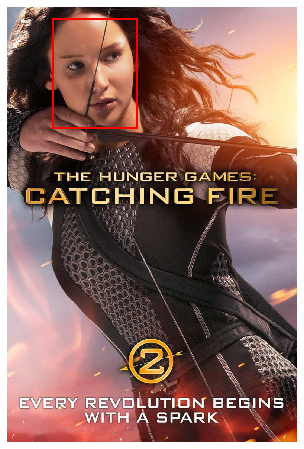

In [487]:
view_dataset_sample(Image.open("data/posters/The Hunger Games: Catching Fire/uio5Soku69zkKbfLxZkl0ZRyq8I.jpg"), [(32, 350, 325, 124)])

In [ ]:
 lrtd
    t, r, b, l

In [ ]:
344, 601, 276, 73

In [374]:
??view_dataset_sample

Signature: view_dataset_sample(img, boxes)
Source:   
def view_dataset_sample(img,boxes):
    '''
    Code taken from Peter's Kernel 
    https://www.kaggle.com/pestipeti/pytorch-starter-fasterrcnn-train
    '''


    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    for box in boxes:
          # box = box[0].to_numpy()
          # print([0])
          color = (0,0,220) #if p>0.5 else (0,0,0)
          rect = patches.Rectangle((box[3],box[0]),box[2]-box[0],box[1]-box[3],linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
          ax.add_patch(rect)
    ax.set_axis_off()
    ax.imshow(img)
File:      ~/Projects/PosterAnalyzer/<ipython-input-3-0a5dcc8aa38d>
Type:      function


In [475]:
for face_location in [(73, 547, 398, 276)]:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    image = np.asarray(Image.open("data/posters/The Hunger Games/18AhV9TtIQsY0U2YVf3B2mZuc6Z.jpg"))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()


A face is located at pixel location Top: 73, Left: 276, Bottom: 398, Right: 547


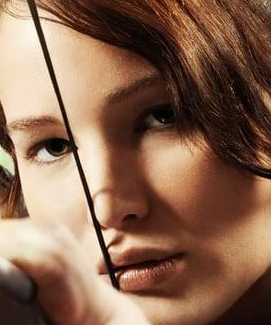

In [476]:
pil_image

In [ ]:
/3cbc323a4VlTHFIU4nGWccwvNHG.jpg


In [62]:
load_and_reduce_image("data/actors/Anita Lindblom-0511450/0.jpg").shape

(1063, 1000)

In [63]:
cv2.imread("data/actors/Anita Lindblom-0511450/0.jpg").shape

(1063, 1000, 3)

In [71]:
np.asarray(Image.open("data/actors/Anita Lindblom-0511450/0.jpg").convert('RGB'))

(1063, 1000, 3)

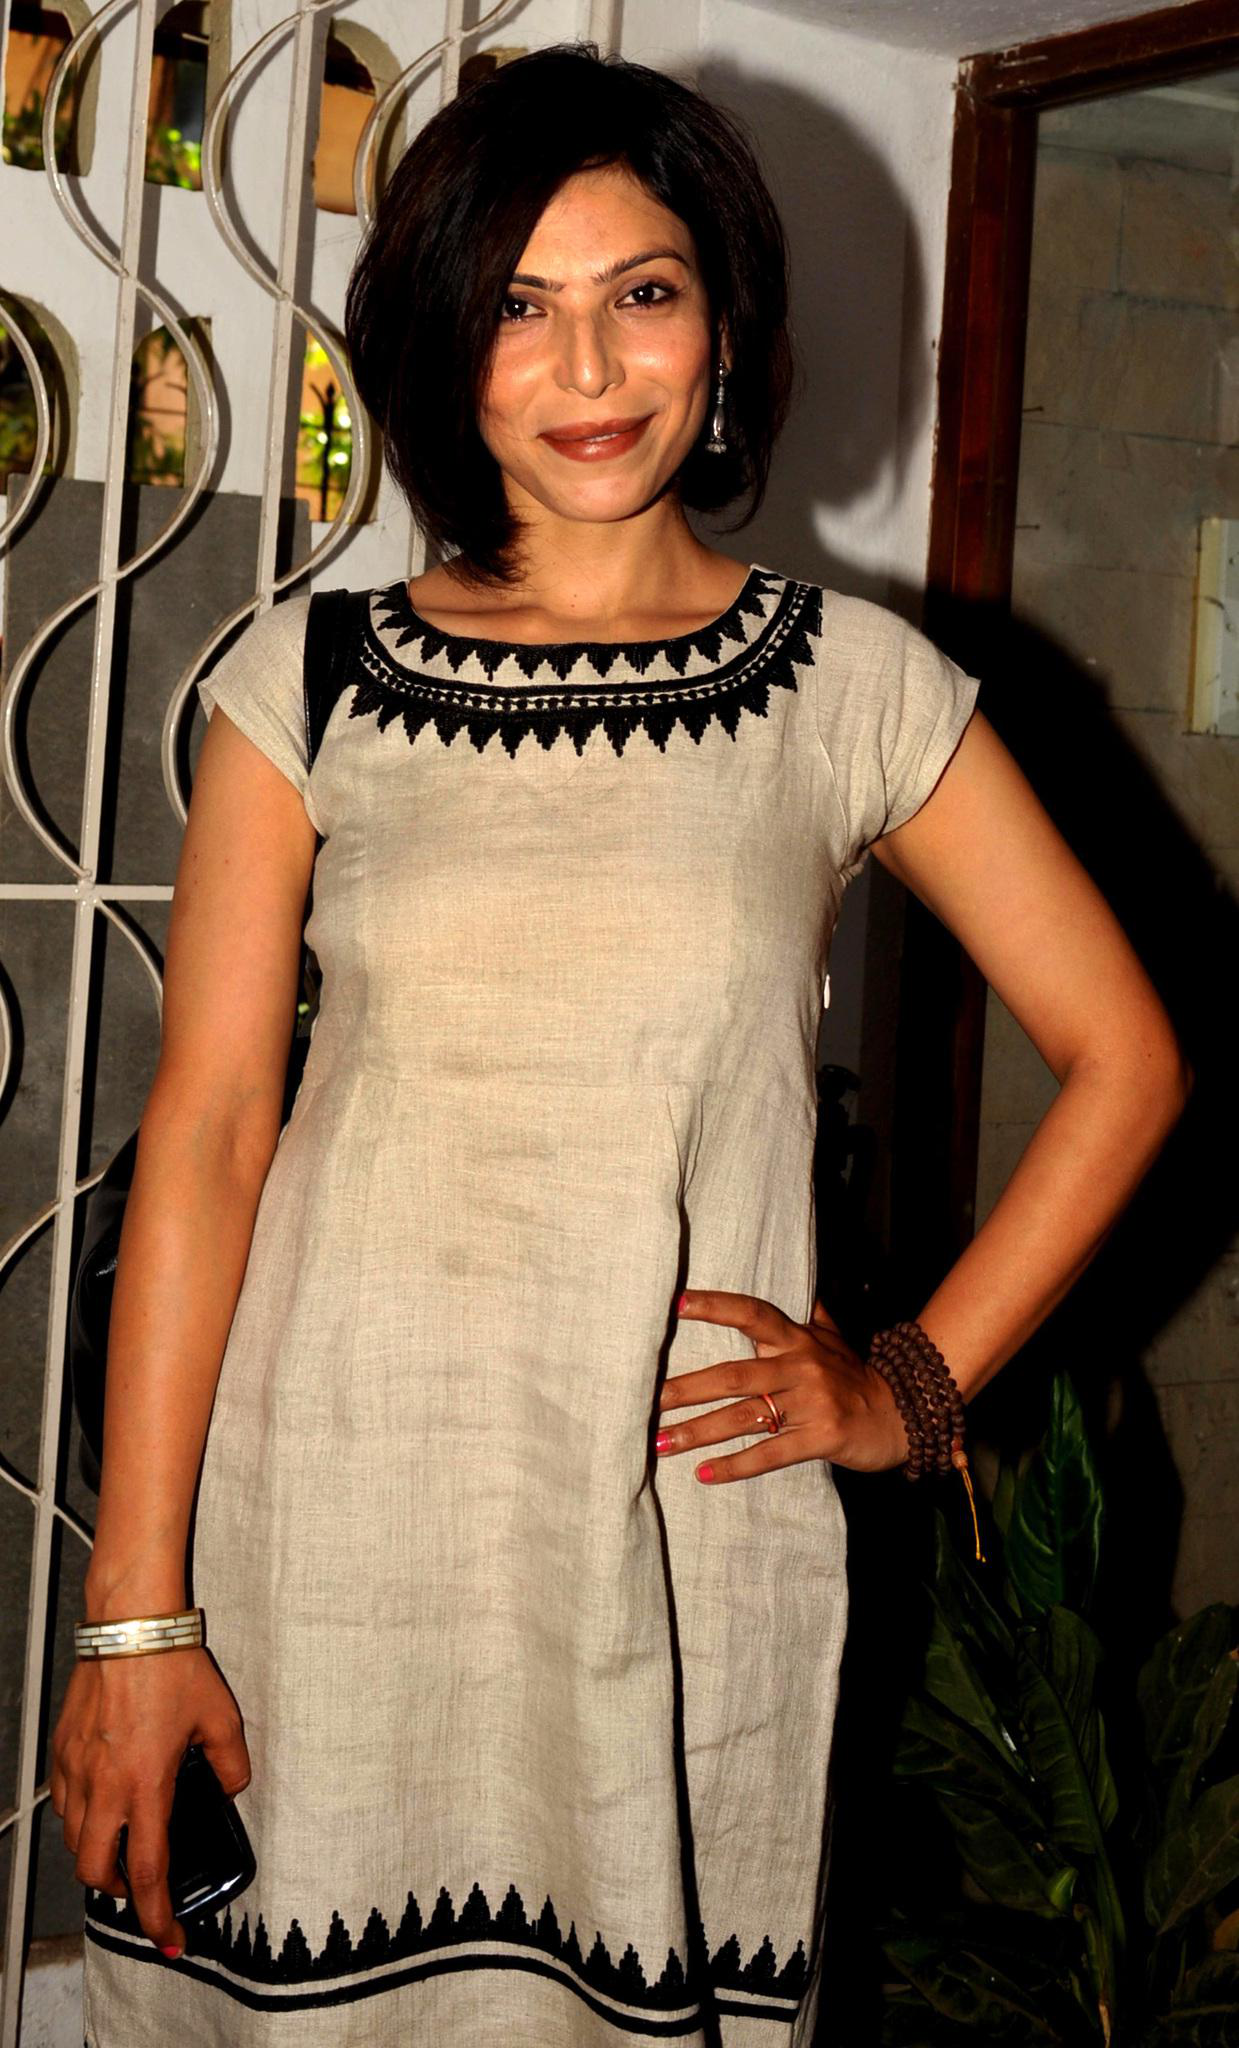

In [78]:
Image.open("data/actors/Shilpa Shukla-1427076/0.jpg")

In [72]:
detector.detect_faces(np.asarray(Image.open("data/actors/Anita Lindblom-0511450/0.jpg").convert('RGB')))

[{'box': [372, 313, 170, 210],
  'confidence': 0.9990395903587341,
  'keypoints': {'left_eye': (397, 388),
   'right_eye': (467, 383),
   'nose': (415, 433),
   'mouth_left': (401, 469),
   'mouth_right': (470, 464)}}]

In [107]:
with (data_path/'posters_face.pkl').open("rb") as f:
    df = pickle.load(f)

In [108]:
posters_faces = df[df["faces"].apply(lambda x: x!=[])]

In [18]:
!ls data/actors | wc -l

51821


In [21]:
!pip list | grep tens

tensorboard             2.0.2               
tensorflow              2.0.0               
tensorflow-estimator    2.0.1               
widgetsnbextension      3.4.2               


In [ ]:
posters_faces

In [115]:
!ls data/movies | head -10

$-0068152.pkl
00 Schneider - Jagd auf Nihil Baxter-0109000.pkl
10-0078721.pkl
1000 Congratulations-2210425.pkl
1,000 Times Good Night-2353767.pkl
100 Meters-5089786.pkl
100 Rifles-0063970.pkl
102 Not Out-6580564.pkl
10 Cloverfield Lane-1179933.pkl
10 Rillington Place-0066730.pkl
ls: write error: Broken pipe


tconst  averageRating  numVotes titleType primaryTitle  \
85243  tt10620868            6.2     19652     movie       #Alive   
85248  tt10620868            6.2     19652     movie       #Alive   
85233  tt10620868            6.2     19652     movie       #Alive   
24712   tt0068152            6.3      2323     movie            $   
98793   tt2614684            7.2     50330     movie          '71   
...           ...            ...       ...       ...          ...   
33890   tt0081809            6.3      4613     movie      ffolkes   
33886   tt0081809            6.3      4613     movie      ffolkes   
33889   tt0081809            6.3      4613     movie      ffolkes   
33887   tt0081809            6.3      4613     movie      ffolkes   
33885   tt0081809            6.3      4613     movie      ffolkes   

          originalTitle  isAdult  startYear  endYear  runtimeMinutes  ...  \
85243         #Saraitda        0     2020.0      NaN            98.0  ...   
85248         #Saraitda        0     2020.0      NaN            98.0  ...   
85233         #Saraitda        0     2020.0      NaN            98.0  ...   
24712                 $        0     1971.0      NaN           121.0  ...   
98793               '71        0     2014.0      NaN            99.0  ...   
...                 ...      ...        ...      ...             ...  ...   
33890  North Sea Hijack        0     1980.0      NaN           100.0  ...   
33886  North Sea Hijack        0     1980.0      NaN           100.0  ...   
33889  North Sea Hijack        0     1980.0      NaN           100.0  ...   
33887  North Sea Hijack        0     1980.0      NaN           100.0  ...   
33885  North Sea Hijack        0     1980.0      NaN           100.0  ...   

       height  iso_639_1    movie  vote_average vote_count   width   dups  \
85243  1063.0         en   #Alive         0.000        0.0   750.0  False   
85248  2149.0         en   #Alive         0.000        0.0  1500.0  False   
85233  2005.0         en   #Alive         5.246        2.0  1336.0  False   
24712  1500.0         en        $         5.312        1.0  1000.0  False   
98793  3000.0         en      '71         0.000        0.0  2000.0  False   
...       ...        ...      ...           ...        ...     ...    ...   
33890  1500.0         en  ffolkes         5.118        4.0  1000.0  False   
33886  1500.0         en  ffolkes         5.190        5.0  1000.0  False   
33889  3000.0         en  ffolkes         5.128        6.0  2000.0  False   
33887  1500.0         en  ffolkes         5.180        3.0  1000.0  False   
33885  1500.0         en  ffolkes         5.246        2.0  1000.0  False   

          pixels             dhash  \
85243   797250.0  60f034afee66cccd   
85248  3223500.0  2cc8e84c46d60fa9   
85233  2678680.0  e0f060a0e868e0c0   
24712  1500000.0  31352d2d071fc9f6   
98793  6000000.0  451d653619e7c7b6   
...          ...               ...   
33890  1500000.0  ee5faa8a248c0837   
33886  1500000.0  12396d4e9ccccee8   
33889  6000000.0  ec9f9ea40c1721ed   
33887  1500000.0  6c4e0e8d0b071f4d   
33885  1500000.0  f5d69e8e3f37a17e   

                                                   faces  
85243  [(575, 487, 636, 405), (583, 709, 670, 597), (...  
85248  [(496, 478, 555, 396), (360, 87, 393, 47), (50...  
85233         [(51, 488, 87, 428), (773, 194, 819, 135)]  
24712       [(477, 507, 521, 449), (483, 364, 521, 314)]  
98793                             [(293, 397, 470, 184)]  
...                                                  ...  
33890  [(345, 190, 429, 73), (266, 738, 436, 515), (2...  
33886  [(285, 325, 395, 182), (603, 169, 680, 67), (9...  
33889  [(213, 666, 356, 491), (198, 484, 341, 299), (...  
33887                             [(110, 425, 166, 354)]  
33885  [(67, 424, 202, 267), (247, 612, 447, 344), (3...  

[20680 rows x 23 columns]

In [111]:
for i, poster_df in tqdm(posters_faces.iterrows(),total=len(posters_faces)):
    poster_path = posters_folder/f'{poster_df["movie"]}{poster_df["file_path"]}'
    poster_image = load_and_reduce_image(poster_path)
    faces_encodings = face_recognition.face_encodings(poster_image,  poster_df["faces"])
        

KeyboardInterrupt: 

In [47]:
def face_recognition_main(movie_title, poster_path):
    top_actors = getMovieTopActors(movie_title, number_of_top_actors)
    top_actors_names = list(map(lambda actor: actor.get('name'), top_actors))
#     print('got top actors!', topActorsNames)

    actors_img_paths = list(filter(None, map(lambda actor: saveActorImage(actor, actors_dir), top_actors)))

#   print('got actors image paths!', actors_img_paths)

    actors_imgs = [(actor_name, loadAndReduceImage(actors_dir)) for (actor_name, actors_dir) in actors_img_paths]
    actors_encodings = []

    for (name, actor_img) in actors_imgs:
        print(f'encoding for {name}')
        encoding = face_recognition.face_encodings(actor_img)
    if len(encoding) == 0:
    #       print(f'not found for {name}')
        encoding = face_recognition.face_encodings(actor_img, known_face_locations=[(0, 129, 129, 0)])

    actors_encodings.append(encoding[0])

#   print('finished encoding')

    poster_image = loadAndReduceImage(poster_path)
    det = detector.detect_faces(poster_image)
    faces_locations = [xy_to_lrtd(line["box"]) for line in det]
#     print('len of locations', len(faces_locations))
    faces_encodings = face_recognition.face_encodings(poster_image, faces_locations)

    result = {}

    for (actor_encoding, (actor_name, path)) in zip(actors_encodings, actors_img_paths):
        comparison = face_recognition.compare_faces(faces_encodings, actor_encoding)
        result[actor_name] = [bool(x) for x in comparison]

    return result

In [71]:
def getMovieTopActors(movieTitle, numberOfTopActors):
    print("searching movie...")
    movieID = ia.search_movie(movieTitle)[0].getID()
    print("found movie id!")

    movie = ia.get_movie(movieID)
    print("got movie!")
    
    cast = movie.get('cast')
    topActors = cast[0:numberOfTopActors]
    
    return topActors 

def saveActorImage(actor, actorSavePath):
    actorName = actor.get('name')
    actorID = actor.getID()
    actorUrl = ia.get_person(actorID).get('full-size headshot')

    if(actorUrl == None):
      return None
    
    return (actorName, saveImg(actorUrl, f'{actorSavePath}/{actorName}.jpg'))

def saveImg(url, savePath):    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.save(savePath)
    
    return savePath



# Main

In [8]:
def analyze_poster(movieTitle, posterPath):
  # face_recognition
  print('face recognition...')
  isActorInPosterDictionary = face_recognition_main(movieTitle, posterPath)
  display(isActorInPosterDictionary)
  
  # # ethnicity check
  print('ethnicity check...')
  ethnicityDictionary = ethnicityMain(movieTitle, posterPath)
  display(ethnicityDictionary)

  return {
      "isActorInPosterDictionary": isActorInPosterDictionary,
      "ethnicityDictionary": ethnicityDictionary
  }

moviesMetaData = [{'imdbID': '1951264', 'title': 'The Hunger Games: Catching Fire'},{'imdbID': '1300854', 'title': 'Iron Man 3'},{'imdbID': '2294629', 'title': 'Frozen'},{'imdbID': '1690953', 'title': 'Despicable Me 2'},{'imdbID': '0770828', 'title': 'Man of Steel'},{'imdbID': '1454468', 'title': 'Gravity'},{'imdbID': '1453405', 'title': 'Monsters University'},{'imdbID': '1170358', 'title': 'The Hobbit: The Desolation of Smaug'},{'imdbID': '3313776', 'title': 'Fast'},{'imdbID': '1623205', 'title': 'Oz the Great and Powerful'},{'imdbID': '1408101', 'title': 'Star Trek Into Darkness'},{'imdbID': '1981115', 'title': 'Thor: The Dark World'},{'imdbID': '0816711', 'title': 'World War Z'},{'imdbID': '0481499', 'title': 'The Croods'},{'imdbID': '2404463', 'title': 'The Heat'},{'imdbID': '1723121', 'title': "We're the Millers"},{'imdbID': '1800241', 'title': 'American Hustle'},{'imdbID': '1457767', 'title': 'The Conjuring'},{'imdbID': '2024432', 'title': 'Identity Thief'},{'imdbID': '2191701', 'title': 'Grown Ups 2'},{'imdbID': '1430132', 'title': 'The Wolverine'},{'imdbID': '1229340', 'title': 'Anchorman 2: The Legend Continues'},{'imdbID': '1091191', 'title': 'Lone Survivor'},{'imdbID': '1583421', 'title': 'G.I. Joe: Retaliation'},{'imdbID': '1985966', 'title': 'Cloudy with a Chance of Meatballs 2'},{'imdbID': '1670345', 'title': 'Now You See Me'},{'imdbID': '0993846', 'title': 'The Wolf of Wall Street'},{'imdbID': '1327773', 'title': "Lee Daniels' The Butler"},{'imdbID': '1951261', 'title': 'The Hangover Part III'},{'imdbID': '0848537', 'title': 'Epic'},{'imdbID': '1535109', 'title': 'Captain Phillips'},{'imdbID': '1663662', 'title': 'Pacific Rim'},{'imdbID': '1245492', 'title': 'This Is the End'},{'imdbID': '2302755', 'title': 'Olympus Has Fallen'},{'imdbID': '0453562', 'title': '42'},{'imdbID': '1535108', 'title': 'Elysium'},{'imdbID': '1691917', 'title': 'Planes'},{'imdbID': '1210819', 'title': 'The Lone Ranger'},{'imdbID': '1483013', 'title': 'Oblivion'},{'imdbID': '2226417', 'title': 'Insidious: Chapter 2'},{'imdbID': '2140373', 'title': 'Saving Mr. Banks'},{'imdbID': '1860353', 'title': 'Turbo'},{'imdbID': '1272878', 'title': '2 Guns'},{'imdbID': '2334879', 'title': 'White House Down'},{'imdbID': '2023587', 'title': 'Mama'},{'imdbID': '1702439', 'title': 'Safe Haven'},{'imdbID': '2017020', 'title': 'The Smurfs 2'},{'imdbID': '2083355', 'title': 'The Best Man Holiday'},{'imdbID': '1854564', 'title': 'Percy Jackson: Sea of Monsters'},{'imdbID': '1606378', 'title': 'A Good Day to Die Hard'},{'imdbID': '1588173', 'title': 'Warm Bodies'},{'imdbID': '1351685', 'title': 'Jack the Giant Slayer'},{'imdbID': '2184339', 'title': 'The Purge'},{'imdbID': '1204975', 'title': 'Last Vegas'},{'imdbID': '1731141', 'title': "Ender's Game"},{'imdbID': '1392214', 'title': 'Prisoners'},{'imdbID': '1815862', 'title': 'After Earth'},{'imdbID': '0359950', 'title': 'The Secret Life of Walter Mitty'},{'imdbID': '0765446', 'title': 'Escape from Planet Earth'},{'imdbID': '2024544', 'title': '12 Years a Slave'},{'imdbID': '1621039', 'title': 'Free Birds'},{'imdbID': '1821694', 'title': 'RED 2'},{'imdbID': '2609758', 'title': "Tyler Perry's A Madea Christmas"},{'imdbID': '1911644', 'title': 'The Call'},{'imdbID': '1321870', 'title': 'Gangster Squad'},{'imdbID': '3206598', 'title': 'The World of Jurassic Park 3D'},{'imdbID': '2234155', 'title': 'The Internship'},{'imdbID': '2378281', 'title': 'Instructions Not Included'},{'imdbID': '0882977', 'title': 'Snitch'},{'imdbID': '1411250', 'title': 'Riddick'},{'imdbID': '2734660', 'title': 'A Haunted House'},{'imdbID': '1335975', 'title': '47 Ronin'},{'imdbID': '1322269', 'title': 'August: Osage County'},{'imdbID': '2431286', 'title': 'Philomena'},{'imdbID': '1762399', 'title': 'Walking with Dinosaurs 3D'},{'imdbID': '1572315', 'title': 'Texas Chainsaw 3D'},{'imdbID': '0790736', 'title': 'R.I.P.D.'},{'imdbID': '2334873', 'title': 'Blue Jasmine'},{'imdbID': '2609912', 'title': 'Kevin Hart: Let Me Explain'},{'imdbID': '0795461', 'title': 'Scary Movie 5'},{'imdbID': '1538403', 'title': 'The Mortal Instruments: City of Bones'},{'imdbID': '2387559', 'title': 'Delivery Man'},{'imdbID': '1661382', 'title': 'Grudge Match'},{'imdbID': '2515086', 'title': 'One Direction: This Is Us'},{'imdbID': '1650554', 'title': 'Kick-Ass 2'},{'imdbID': '0790636', 'title': 'Dallas Buyers Club'},{'imdbID': '1213663', 'title': "The World's End"},{'imdbID': '1211956', 'title': 'Escape Plan'},{'imdbID': '2229499', 'title': 'Don Jon'},{'imdbID': '0790628', 'title': 'The Incredible Burt Wonderstone'},{'imdbID': '1931435', 'title': 'The Big Wedding'},{'imdbID': '3379694', 'title': 'And the Mud Ship Sails Away...'},{'imdbID': '1171222', 'title': 'Baggage Claim'},{'imdbID': '1727388', 'title': 'The Way Way Back'},{'imdbID': '0816442', 'title': 'The Book Thief'},{'imdbID': '2313774', 'title': 'Homefront'},{'imdbID': '1235522', 'title': 'Broken City'},{'imdbID': '2364841', 'title': 'Runner Runner'},{'imdbID': '3169640', 'title': 'Yozakura Quartet: Hana no Uta'},{'imdbID': '1814621', 'title': 'Admission'},{'imdbID': '1821549', 'title': 'Nebraska'},{'imdbID': '1904996', 'title': 'Parker'},{'imdbID': '2390361', 'title': 'Enough Said'},{'imdbID': '2387433', 'title': 'Dark Skies'},{'imdbID': '2193215', 'title': 'The Counselor'},{'imdbID': '2357129', 'title': 'Jobs'},{'imdbID': '2334649', 'title': 'Fruitvale Station'},{'imdbID': '2194499', 'title': 'About Time'},{'imdbID': '2034139', 'title': 'The Last Exorcism Part II'},{'imdbID': '2042568', 'title': 'Inside Llewyn Davis'},{'imdbID': '1549920', 'title': 'The Last Stand'},{'imdbID': '1206543', 'title': 'Out of the Furnace'},{'imdbID': '2101341', 'title': 'Dead Man Down'},{'imdbID': '4047068', 'title': 'Bullet to the Head: Mayhem Inc.'},{'imdbID': '1532958', 'title': 'Battle of the Year'},{'imdbID': '1333125', 'title': 'Movie 43'},{'imdbID': '2304771', 'title': 'Mandela: Long Walk to Freedom'},{'imdbID': '2209418', 'title': 'Before Midnight'},{'imdbID': '1833673', 'title': 'Dhoom:3'},{'imdbID': '2385006', 'title': 'Jerusalem'},{'imdbID': '2002718', 'title': 'Machete Kills'},{'imdbID': '1413495', 'title': 'Paranoia'},{'imdbID': '3195742', 'title': 'Journey to the South Pacific'},{'imdbID': '1425922', 'title': 'Black Nativity'},{'imdbID': '1714206', 'title': 'The Spectacular Now'},{'imdbID': '1462900', 'title': 'The Grandmaster'},{'imdbID': '2017038', 'title': 'All Is Lost'},{'imdbID': '2009606', 'title': 'Believe'},{'imdbID': '2132285', 'title': 'The Bling Ring'},{'imdbID': '3203890', 'title': 'Pulling Strings'},{'imdbID': '2218003', 'title': 'Closed Circuit'},{'imdbID': '2112124', 'title': 'Chennai Express'},{'imdbID': '2178470', 'title': 'Yeh Jawaani Hai Deewani'},{'imdbID': '1758795', 'title': 'The To Do List'},{'imdbID': '2172935', 'title': 'Metallica Through the Never'},{'imdbID': '1858776', 'title': 'RockBarnes: The Emperor in You'},{'imdbID': '1837703', 'title': 'The Fifth Estate'},{'imdbID': '2294677', 'title': 'In a World...'},{'imdbID': '2051894', 'title': 'Home Run'},{'imdbID': '2358891', 'title': 'The Great Beauty'},{'imdbID': '2215477', 'title': 'Goliyon Ki Rasleela Ram-Leela'},{'imdbID': '2349460', 'title': 'Grace Unplugged'},{'imdbID': '1618432', 'title': "I'm in Love with a Church Girl"},{'imdbID': '1924429', 'title': 'Trance'},{'imdbID': '1869716', 'title': 'The East'},{'imdbID': '2819924', 'title': 'Candice Renoir'},{'imdbID': '2739338', 'title': 'The Christmas Candle'},{'imdbID': '2278871', 'title': 'Blue Is the Warmest Color'},{'imdbID': '1029231', 'title': 'Krrish 3'},{'imdbID': '1985019', 'title': 'Austenland'},{'imdbID': '2887322', 'title': 'The Saratov Approach'},{'imdbID': '2545118', 'title': 'Blackfish'},{'imdbID': '2444946', 'title': 'Girl Rising'},{'imdbID': '3041534', 'title': 'The Attack of the Brain People'},{'imdbID': '1682180', 'title': 'Stoker'},{'imdbID': '2356180', 'title': 'Bhaag Milkha Bhaag'},{'imdbID': '1375789', 'title': 'Race 2'},{'imdbID': '1390398', 'title': 'Bless Me, Ultima'},{'imdbID': '3294904', 'title': 'Disconnect. Reconnect.'},{'imdbID': '2243389', 'title': "I'm So Excited!"},{'imdbID': '2404461', 'title': 'The Past'},{'imdbID': '1778924', 'title': 'The Ultimate Life'},{'imdbID': '2179116', 'title': 'The Kings of Summer'},{'imdbID': '1700845', 'title': 'The Invisible Woman'},{'imdbID': '2215151', 'title': 'Inequality for All'},{'imdbID': '2213054', 'title': 'Kai po che!'},{'imdbID': '1311071', 'title': 'Kill Your Darlings'},{'imdbID': '2370248', 'title': 'Short Term 12'},{'imdbID': '3463312', 'title': 'Ginger'},{'imdbID': '1986769', 'title': 'Alone Yet Not Alone'},{'imdbID': '2205904', 'title': 'Generation Iron'},{'imdbID': '1602613', 'title': 'Only God Forgives'},{'imdbID': '2275802', 'title': 'Satyagraha'},{'imdbID': '2492916', 'title': 'Muscle Shoals'},{'imdbID': '2576450', 'title': 'Besharam'},{'imdbID': '2357377', 'title': 'The Berlin File'},{'imdbID': '2345112', 'title': 'Parkland'},{'imdbID': '2590506', 'title': 'The Hunt'},{'imdbID': '2406422', 'title': 'Walking the Camino: Six Ways to Santiago'},{'imdbID': '1596753', 'title': 'Salinger'},{'imdbID': '2224317', 'title': 'Lootera'},{'imdbID': '1390539','title': 'The Lost Medallion: The Adventures of Billy Stone'},{'imdbID': '1893326', 'title': "Scatter My Ashes at Bergdorf's"},{'imdbID': '3008014', 'title': 'The Face Reader'},{'imdbID': '2084989', 'title': 'Upstream Color'},{'imdbID': '2306745', 'title': 'Sound City'},{'imdbID': '2476154', 'title': 'Grand Masti'},{'imdbID': '2388637', 'title': "Ain't Them Bodies Saints"},{'imdbID': '2532528', 'title': 'Dirty Wars'},{'imdbID': '1638364', 'title': 'The Armstrong Lie'},{'imdbID': '2992152', 'title': 'Personal Tailor'},{'imdbID': '2301155', 'title': 'Shootout at Wadala'},{'imdbID': '2167056', 'title': 'When Comedy Went to School'},{'imdbID': '1426329', 'title': 'Lovelace'},{'imdbID': '2265398', 'title': 'Drinking Buddies'},{'imdbID': '2545338', 'title': 'Citizen Koch'},{'imdbID': '2275794', 'title': 'Gori Tere Pyaar Mein'},{'imdbID': '1758595', 'title': 'Diana'},{'imdbID': '2103267', 'title': 'Adore'},{'imdbID': '1564870', 'title': 'Not Today'},{'imdbID': '2359427', 'title': 'Linsanity'},{'imdbID': '2436516', 'title': 'Go Goa Gone'},{'imdbID': '2571226', 'title': 'The Anonymous People'},{'imdbID': '2344678', 'title': 'Himmatwala'},{'imdbID': '3259324', 'title': 'The Summit'},{'imdbID': '1754811', 'title': 'InAPPropriate Comedy'},{'imdbID': '2437954', 'title': 'Singh Saab the Great'},{'imdbID': '2321163', 'title': 'ABCD (Any Body Can Dance)'},{'imdbID': '2195548', 'title': 'Prince Avalanche'},{'imdbID': '2246724', 'title': 'Ghanchakkar'},{'imdbID': '2332579', 'title': 'Crystal Fairy & the Magical Cactus'},{'imdbID': '2355540', 'title': 'Cutie and the Boxer'},{'imdbID': '1311060', 'title': 'A.C.O.D.'},{'imdbID': '2312890', 'title': 'Afternoon Delight'},{'imdbID': '2553908', 'title': 'Cinco de Mayo, La Batalla'},{'imdbID': '2187884', 'title': 'Escape from Tomorrow'},{'imdbID': '2404555', 'title': 'Copperhead'},{'imdbID': '2369154', 'title': 'R... Rajkumar'},{'imdbID': '1824254', 'title': 'We Steal Secrets: The Story of WikiLeaks'},{'imdbID': '2717558', 'title': 'On the Job'},{'imdbID': '2094890', 'title': 'Mother of George'},{'imdbID': '2622130', 'title': 'Jayantabhai Ki Luv Story'},{'imdbID': '2852400', 'title': 'A Touch of Sin'},{'imdbID': '1718898', 'title': 'Snake and Mongoose'},{'imdbID': '2821880', 'title': 'Rangeelay'},{'imdbID': '2545088', 'title': 'American Promise'},{'imdbID': '2504022', 'title': 'Narco Cultura'},{'imdbID': '2505938', 'title': "Good Ol' Freda"},{'imdbID': '1817287', 'title': 'Is the Man Who Is Tall Happy?'},{'imdbID': '2828840', 'title': 'Fists of Legend'},{'imdbID': '2820820', 'title': 'American Drug War 2: Cannabis Destiny'},{'imdbID': '2051879', 'title': 'Europa Report'},{'imdbID': '2806788', 'title': 'Fukrey'},{'imdbID': '2710368', 'title': 'Final: The Rapture'},{'imdbID': '1785612', 'title': 'The Punk Singer'},{'imdbID': '2554648', 'title': 'Spark: A Burning Man Story'},{'imdbID': '2406676', 'title': 'Ek Thi Daayan'},{'imdbID': '2055765', 'title': 'The English Teacher'},{'imdbID': '1922748', 'title': 'The Investigator'},{'imdbID': '2761118', 'title': 'Stevie Nicks: In Your Dreams'},{'imdbID': '2007360', 'title': 'Computer Chess'},{'imdbID': '3499064', 'title': 'Mamma Therese'},{'imdbID': '3102762', 'title': 'Capital'},{'imdbID': '3332860', 'title': 'Una Noche Inolvidable'},{'imdbID': '2276023', 'title': 'The United States of Autism'},{'imdbID': '2016940', 'title': 'Man of Tai Chi'},{'imdbID': '2027064', 'title': 'Blue Caprice'},{'imdbID': '3573194', 'title': 'Byzantium a Tale of Three Cities'},{'imdbID': '2752724', 'title': 'Money for Nothing: Inside the Federal Reserve'},{'imdbID': '2677816', 'title': 'Settai'},{'imdbID': '2992146', 'title': 'Young Detective Dee: Rise of the Sea Dragon'},{'imdbID': '2901548', 'title': 'The Rooftop'},{'imdbID': '1356790', 'title': 'I Am Divine'},{'imdbID': '2309021', 'title': 'We Are What We Are'},{'imdbID': '2357926', 'title': 'Ramaiya Vastavaiya'},{'imdbID': '3144098', 'title': 'Commitment'},{'imdbID': '2430104', 'title': 'After Tiller'},{'imdbID': '1710469', 'title': 'Seasons of Gray'},{'imdbID': '2247432', 'title': 'Go for Sisters'},{'imdbID': '2555268', 'title': 'Maidentrip'},{'imdbID': '1992193', 'title': "Pandora's Promise"},{'imdbID': '2119463', 'title': 'Let the Fire Burn'},{'imdbID': '2102502', 'title': 'My Lucky Star'},{'imdbID': '1894476', 'title': 'How I Live Now'},{'imdbID': '2489734', 'title': 'The Trials of Muhammad Ali'},{'imdbID': '3989646', 'title': "Faust's Growth"},{'imdbID': '2292959', 'title': 'The Canyons'},{'imdbID': '2084953', 'title': 'Terms and Conditions May Apply'},{'imdbID': '2848824', 'title': 'Bajatey Raho'},{'imdbID': '1650393', 'title': 'C.O.G.'},{'imdbID': '3282770', 'title': 'Leonie Ossowski'},{'imdbID': '2461226', 'title': 'Going Attractions: The Definitive Story of the American Drive-in Movie'},{'imdbID': '1874513', 'title': 'God Loves Uganda'},{'imdbID': '2506388', 'title': 'Mademoiselle C'},{'imdbID': '2461034', 'title': 'GMO OMG'},{'imdbID': '2229842', 'title': 'Table No. 21'},{'imdbID': '2217458', 'title': 'Reaching for the Moon'},{'imdbID': '2710614', 'title': 'American Made Movie'},{'imdbID': '3086582', 'title': 'Tiny Times 2.0'},{'imdbID': '2235248', 'title': 'Andre Gregory: Before and After Dinner'},{'imdbID': '2296697', 'title': 'Concussion'},{'imdbID': '2158531', 'title': 'Holla II'},{'imdbID': '1786751', 'title': 'CBGB'},{'imdbID': '1480295', 'title': 'Killing Season'},{'imdbID': '2466830', 'title': 'The Short Game'},{'imdbID': '2495118', 'title': 'Ip Man: The Final Fight'},{'imdbID': '1462411', 'title': 'Big Sur'},{'imdbID': '1797487', 'title': 'Savannah'},{'imdbID': '2364949', 'title': 'Touchy Feely'},{'imdbID': '2018086', 'title': 'Camille Claudel 1915'},{'imdbID': '1634003', 'title': 'Underdogs'},{'imdbID': '2244901', 'title': 'I Give It a Year'},{'imdbID': '2451742', 'title': 'Running from Crazy'},{'imdbID': '3091552', 'title': 'At Berkeley'},{'imdbID': '1605791', 'title': 'Beyond the Farthest Star'},{'imdbID': '2130282', 'title': 'These Birds Walk'},{'imdbID': '1787067', 'title': 'Fire in the Blood'},{'imdbID': '2689966', 'title': 'Broadway Idiot'},{'imdbID': '0817545', 'title': 'The Power of Few'},{'imdbID': '2393813', 'title': 'Graceland'},{'imdbID': '2821088', 'title': 'Bastards'},{'imdbID': '1709143', 'title': 'The Last Days on Mars'},{'imdbID': '2222206', 'title': 'Dear Mr. Watterson'},{'imdbID': '1941541', 'title': 'Greenwich Village: Music That Defined a Generation'},{'imdbID': '3043630', 'title': 'Tiny Times 1.0'},{'imdbID': '2147728', 'title': 'I Used to Be Darker'},{'imdbID': '3292836', 'title': "M Is for Metamorphose: The ABC's of Death 2"},{'imdbID': '2324012', 'title': 'My Name Is Viola'},{'imdbID': '1986998', 'title': 'Tio Papi'},{'imdbID': '1951216', 'title': 'The Look of Love'},{'imdbID': '2654562', 'title': 'The Ghosts in Our Machine'},{'imdbID': '2282662', 'title': 'Our Nixon'},{'imdbID': '1280725', 'title': 'Wedding Palace'},{'imdbID': '2274570', 'title': 'Bad Milo'},{'imdbID': '2913948', 'title': 'Whensday'},{'imdbID': '2250032', 'title': 'Smash & Grab: The Story of the Pink Panthers'},{'imdbID': '1540741', 'title': 'A Single Shot'},{'imdbID': '1423636', 'title': 'Torn'},{'imdbID': '3116072', 'title': 'Jamel Shabazz Street Photographer'},{'imdbID': '2948266', 'title': "Dealin' with Idiots"},{'imdbID': '2377398', 'title': 'Violet'},{'imdbID': '1807944', 'title': 'As I Lay Dying'},{'imdbID': '2636522', 'title': 'The Unbelievers'},{'imdbID': '2910520', 'title': 'A Wedding Invitation'},{'imdbID': '2289920', 'title': 'Justice Is Mind'},{'imdbID': '1992156', 'title': 'Il Futuro'},{'imdbID': '1798291', 'title': 'This Is Martin Bonner'},{'imdbID': '2419284', 'title': 'Red Obsession'},{'imdbID': '2304426', 'title': 'The Selfish Giant'},{'imdbID': '2193364', 'title': 'I Am Shahid Afridi'},{'imdbID': '1196948', 'title': 'Charlie Countryman'},{'imdbID': '2186663', 'title': '36 Saints'},{'imdbID': '2765340', 'title': 'So Young'},{'imdbID': '1817276', 'title': 'A Resurrection'},{'imdbID': '2261409', 'title': 'Made in Cleveland'},{'imdbID': '1482980', 'title': 'American Meat'},{'imdbID': '2481246', 'title': 'Caucus'},{'imdbID': '2673854', 'title': 'Midget Zombie Takeover'},{'imdbID': '3498042', 'title': 'Elemental Mass'},{'imdbID': '2121304', 'title': 'The Informant'},{'imdbID': '2650642', 'title': 'In the Name Of'},{'imdbID': '2507128', 'title': 'Birth of the Living Dead'},{'imdbID': '1684233', 'title': 'Welcome to the Punch'},{'imdbID': '2294965', 'title': 'Zero Charisma'},{'imdbID': '2272336', 'title': 'Ghost Team One'},{'imdbID': '2339379', 'title': 'Big Words'},{'imdbID': '3139710', 'title': 'White Elephant'},{'imdbID': '2318527', 'title': 'Hell Baby'},{'imdbID': '2386327', 'title': 'The Institute'},{'imdbID': '2049559', 'title': 'The Happy Sad'},{'imdbID': '2033981', 'title': 'Downloaded'},{'imdbID': '2201548', 'title': 'A Teacher'},{'imdbID': '2650054', 'title': 'La Maison de la radio'},{'imdbID': '1741243', 'title': 'Pawn Shop Chronicles'},{'imdbID': '1662293', 'title': 'Nothing Left to Fear'},{'imdbID': '2401007', 'title': 'Desperate Acts of Magic'},{'imdbID': '2275471', 'title': 'A Perfect Man'},{'imdbID': '2169322', 'title': 'Finding Mr. Right'},{'imdbID': '2520398', 'title': 'Assaulted: Civil Rights Under Fire'},{'imdbID': '2371834', 'title': 'Paradise: Hope'},{'imdbID': '2231138', 'title': 'Some Velvet Morning'},{'imdbID': '2224004', 'title': 'Sweetwater'},{'imdbID': '2706264', 'title': 'Rangrezz'},{'imdbID': '3332118', 'title': 'The Playroom'},{'imdbID': '2186781', 'title': 'Five Dances'},{'imdbID': '2884170', 'title': 'Knife Fight'},{'imdbID': '2825924', 'title': 'Revelation Road 2: The Sea of Glass and Fire'},{'imdbID': '2644800', 'title': 'Hôtel Normandy'},{'imdbID': '1462901', 'title': 'All Is Bright'},{'imdbID': '2640474', 'title': 'The House at the End of Time'},{'imdbID': '1817081', 'title': 'A Case of You'},{'imdbID': '1825784', 'title': '3 Geezers!'},{'imdbID': '1551630', 'title': 'Pawn'},{'imdbID': '2281159', 'title': 'Contracted'},{'imdbID': '3504226', 'title': 'Weekend of a Champion'},{'imdbID': '1748199', 'title': 'Silver Circle'},{'imdbID': '2896952', 'title': 'Barefoot in the Kitchen'},{'imdbID': '3335074', 'title': 'Tricked'},{'imdbID': '2012011', 'title': 'Scenic Route'},{'imdbID': '1684548', 'title': 'Axe Giant: The Wrath of Paul Bunyan'},{'imdbID': '1906329', 'title': 'As Cool as I Am'},{'imdbID': '2226519', 'title': 'Plush'},{'imdbID': '1486843', 'title': 'Drew: The Man Behind the Poster'},{'imdbID': '1735279', 'title': 'A Girl and a Gun'},{'imdbID': '0837559', 'title': 'Approaching Midnight'},{'imdbID': '2709606', 'title': 'Last Flight of the Champion'},{'imdbID': '2070852', 'title': 'The Happy House'},{'imdbID': '1705111', 'title': 'InSpectres'},{'imdbID': '2734552', 'title': "You Don't Need Feet to Dance"},{'imdbID': '1925479', 'title': 'Officer Down'},{'imdbID': '3216182', 'title': 'Bharat Ka Veer Putra - Maharana Pratap'},{'imdbID': '2083231', 'title': 'Java Heat'},{'imdbID': '2402163', 'title': 'Paris Countdown'},{'imdbID': '2736254', 'title': 'Absence'},{'imdbID': '1487931', 'title': 'Khumba'},{'imdbID': '1800367', 'title': 'Remnants'},{'imdbID': '2537176', 'title': 'I Spit on Your Grave 2'},{'imdbID': '0762138', 'title': 'Syrup'},{'imdbID': '2193418', 'title': 'Hammer of the Gods'},{'imdbID': '2278668', 'title': 'Triumph of the Wall'}]

dir = '/content/gdrive/My Drive/עבודות/תואר שני/עבודת גמר/data/movies/imdb'
filename = '/content/gdrive/My Drive/עבודות/תואר שני/עבודת גמר/results/result-face-ethnicity.json'

# try:
#   with open(filename) as f:
#     result = json.load(f)
# except:
#   result = {}
result={}

for movie in [{'imdbID': '1951264', 'title': 'The Hunger Games: Catching Fire'}]:#moviesMetaData:
  posterName = movie["title"]
  
  try:
    print(f'now analyzing {posterName}')
    result[posterName] = analyze_poster(posterName, f'{dir}/{posterName}.jpg')
  except:
    print("#####################################################")
    print(f'{posterName} got an error')
    print("#####################################################")
    continue
  
  # with open(filename, 'w') as outfile:
  #     json.dump(result, outfile)
  # print('saved json !')

result

now analyzing The Hunger Games: Catching Fire
face recognition...
searching movie...
found movie id!
got movie!
got top actors! ['Jennifer Lawrence', 'Liam Hemsworth', 'Jack Quaid', 'Taylor St. Clair', 'Sandra Ellis Lafferty']
got actors image paths! [('Jennifer Lawrence', 'actors/Jennifer Lawrence.jpg'), ('Liam Hemsworth', 'actors/Liam Hemsworth.jpg'), ('Jack Quaid', 'actors/Jack Quaid.jpg'), ('Taylor St. Clair', 'actors/Taylor St. Clair.jpg'), ('Sandra Ellis Lafferty', 'actors/Sandra Ellis Lafferty.jpg')]
encoding for Jennifer Lawrence
encoding for Liam Hemsworth
encoding for Jack Quaid
encoding for Taylor St. Clair
encoding for Sandra Ellis Lafferty
finished encoding
len of locations 1


{'Jack Quaid': [False],
 'Jennifer Lawrence': [True],
 'Liam Hemsworth': [False],
 'Sandra Ellis Lafferty': [False],
 'Taylor St. Clair': [False]}

ethnicity check...


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

len of locations-ethnicity 1
0 - asian


{0: 'asian'}

{'The Hunger Games: Catching Fire': {'ethnicityDictionary': {0: 'asian'},
  'isActorInPosterDictionary': {'Jack Quaid': [False],
   'Jennifer Lawrence': [True],
   'Liam Hemsworth': [False],
   'Sandra Ellis Lafferty': [False],
   'Taylor St. Clair': [False]}}}

# Get Posters

In [ ]:


# from PIL import Image
# PIL.Image.MAX_IMAGE_PIXELS = 122760000
# movies = [{"imdbID": "1951264","title": "The Hunger Games: Catching Fire",},{"imdbID": "1300854","title": "Iron Man 3",},{"imdbID": "2294629","title": "Frozen",},{"imdbID": "1690953","title": "Despicable Me 2",},{"imdbID": "0770828","title": "Man of Steel",},{"imdbID": "1454468","title": "Gravity",},{"imdbID": "1453405","title": "Monsters University",},{"imdbID": "1170358","title": "The Hobbit: The Desolation of Smaug",},{"imdbID": "3313776","title": "Fast",},{"imdbID": "1623205","title": "Oz the Great and Powerful",},{"imdbID": "1408101","title": "Star Trek Into Darkness",},{"imdbID": "1981115","title": "Thor: The Dark World",},{"imdbID": "0816711","title": "World War Z",},{"imdbID": "0481499","title": "The Croods",},{"imdbID": "2404463","title": "The Heat",},{"imdbID": "1723121","title": "We're the Millers",},{"imdbID": "1800241","title": "American Hustle",},{"imdbID": "1457767","title": "The Conjuring",},{"imdbID": "2024432","title": "Identity Thief",},{"imdbID": "2191701","title": "Grown Ups 2",},{"imdbID": "1430132","title": "The Wolverine",},{"imdbID": "1229340","title": "Anchorman 2: The Legend Continues",},{"imdbID": "1091191","title": "Lone Survivor",},{"imdbID": "1583421","title": "G.I. Joe: Retaliation",},{"imdbID": "1985966","title": "Cloudy with a Chance of Meatballs 2",},{"imdbID": "1670345","title": "Now You See Me",},{"imdbID": "0993846","title": "The Wolf of Wall Street",},{"imdbID": "1327773","title": "Lee Daniels' The Butler",},{"imdbID": "1951261","title": "The Hangover Part III",},{"imdbID": "0848537","title": "Epic",},{"imdbID": "1535109","title": "Captain Phillips",},{"imdbID": "1663662","title": "Pacific Rim",},{"imdbID": "1245492","title": "This Is the End",},{"imdbID": "2302755","title": "Olympus Has Fallen",},{"imdbID": "0453562","title": "42",},{"imdbID": "1535108","title": "Elysium",},{"imdbID": "1691917","title": "Planes",},{"imdbID": "1210819","title": "The Lone Ranger",},{"imdbID": "1483013","title": "Oblivion",},{"imdbID": "2226417","title": "Insidious: Chapter 2",},{"imdbID": "2140373","title": "Saving Mr. Banks",},{"imdbID": "1860353","title": "Turbo",},{"imdbID": "1272878","title": "2 Guns",},{"imdbID": "2334879","title": "White House Down",},{"imdbID": "2023587","title": "Mama",},{"imdbID": "1702439","title": "Safe Haven",},{"imdbID": "2017020","title": "The Smurfs 2",},{"imdbID": "2083355","title": "The Best Man Holiday",},{"imdbID": "1854564","title": "Percy Jackson: Sea of Monsters",},{"imdbID": "1606378","title": "A Good Day to Die Hard",},{"imdbID": "1588173","title": "Warm Bodies",},{"imdbID": "1351685","title": "Jack the Giant Slayer",},{"imdbID": "2184339","title": "The Purge",},{"imdbID": "1204975","title": "Last Vegas",},{"imdbID": "1731141","title": "Ender's Game",},{"imdbID": "1392214","title": "Prisoners",},{"imdbID": "1815862","title": "After Earth",},{"imdbID": "0359950","title": "The Secret Life of Walter Mitty",},{"imdbID": "0765446","title": "Escape from Planet Earth",},{"imdbID": "2024544","title": "12 Years a Slave",},{"imdbID": "1621039","title": "Free Birds",},{"imdbID": "1821694","title": "RED 2",},{"imdbID": "2609758","title": "Tyler Perry's A Madea Christmas",},{"imdbID": "1911644","title": "The Call",},{"imdbID": "1321870","title": "Gangster Squad",},{"imdbID": "3206598","title": "The World of Jurassic Park 3D",},{"imdbID": "2234155","title": "The Internship",},{"imdbID": "2378281","title": "Instructions Not Included",},{"imdbID": "0882977","title": "Snitch",},{"imdbID": "1411250","title": "Riddick",},{"imdbID": "2734660","title": "A Haunted House",},{"imdbID": "1335975","title": "47 Ronin",},{"imdbID": "1322269","title": "August: Osage County",},{"imdbID": "2431286","title": "Philomena",},{"imdbID": "1762399","title": "Walking with Dinosaurs 3D",},{"imdbID": "4207012","title": "Carrie 2013 Official Parody: Where Mom Tries to Date!",},{"imdbID": "1572315","title": "Texas Chainsaw 3D",},{"imdbID": "0790736","title": "R.I.P.D.",},{"imdbID": "2334873","title": "Blue Jasmine",},{"imdbID": "2609912","title": "Kevin Hart: Let Me Explain",},{"imdbID": "0795461","title": "Scary Movie 5",},{"imdbID": "1538403","title": "The Mortal Instruments: City of Bones",},{"imdbID": "2387559","title": "Delivery Man",},{"imdbID": "1661382","title": "Grudge Match",},{"imdbID": "2515086","title": "One Direction: This Is Us",},{"imdbID": "1650554","title": "Kick-Ass 2",},{"imdbID": "0790636","title": "Dallas Buyers Club",},{"imdbID": "1213663","title": "The World's End",},{"imdbID": "1211956","title": "Escape Plan",},{"imdbID": "2229499","title": "Don Jon",},{"imdbID": "0790628","title": "The Incredible Burt Wonderstone",},{"imdbID": "1931435","title": "The Big Wedding",},{"imdbID": "3379694","title": "And the Mud Ship Sails Away...",},{"imdbID": "1171222","title": "Baggage Claim",},{"imdbID": "1727388","title": "The Way Way Back",},{"imdbID": "0816442","title": "The Book Thief",},{"imdbID": "3504988","title": "Going to the Place Beyond the Pines",},{"imdbID": "2313774","title": "Homefront",},{"imdbID": "1235522","title": "Broken City",},{"imdbID": "2364841","title": "Runner Runner",},{"imdbID": "3169640","title": "Yozakura Quartet: Hana no Uta",},{"imdbID": "1814621","title": "Admission",},{"imdbID": "1821549","title": "Nebraska",},{"imdbID": "1904996","title": "Parker",},{"imdbID": "2390361","title": "Enough Said",},{"imdbID": "2387433","title": "Dark Skies",},{"imdbID": "2193215","title": "The Counselor",},{"imdbID": "2357129","title": "Jobs",},{"imdbID": "2334649","title": "Fruitvale Station",},{"imdbID": "2194499","title": "About Time",},{"imdbID": "2034139","title": "The Last Exorcism Part II",},{"imdbID": "2042568","title": "Inside Llewyn Davis",},{"imdbID": "1549920","title": "The Last Stand",},{"imdbID": "1206543","title": "Out of the Furnace",},{"imdbID": "2101341","title": "Dead Man Down",},{"imdbID": "4047068","title": "Bullet to the Head: Mayhem Inc.",},{"imdbID": "1532958","title": "Battle of the Year",},{"imdbID": "1333125","title": "Movie 43",},{"imdbID": "2304771","title": "Mandela: Long Walk to Freedom",},{"imdbID": "2209418","title": "Before Midnight",},{"imdbID": "1833673","title": "Dhoom:3",},{"imdbID": "2385006","title": "Jerusalem",},{"imdbID": "2002718","title": "Machete Kills",},{"imdbID": "1413495","title": "Paranoia",},{"imdbID": "3195742","title": "Journey to the South Pacific",},{"imdbID": "1425922","title": "Black Nativity",},{"imdbID": "1714206","title": "The Spectacular Now",},{"imdbID": "1462900","title": "The Grandmaster",},{"imdbID": "2017038","title": "All Is Lost",},{"imdbID": "2009606","title": "Believe",},{"imdbID": "2132285","title": "The Bling Ring",},{"imdbID": "3203890","title": "Pulling Strings",},{"imdbID": "2218003","title": "Closed Circuit",},{"imdbID": "2112124","title": "Chennai Express",},{"imdbID": "5230324","title": "The Company You Keep: Behind-the-Scenes - The Script, Preparation and the Cast",},{"imdbID": "2178470","title": "Yeh Jawaani Hai Deewani",},{"imdbID": "1758795","title": "The To Do List",},{"imdbID": "2172935","title": "Metallica Through the Never",},{"imdbID": "1858776","title": "RockBarnes: The Emperor in You",},{"imdbID": "3272262","title": "Stand Up Guys: The Stand Up Songs of Jon Bon Jovi",},{"imdbID": "1837703","title": "The Fifth Estate",},{"imdbID": "2294677","title": "In a World...",},{"imdbID": "2051894","title": "Home Run",},{"imdbID": "2358891","title": "The Great Beauty",},{"imdbID": "2215477","title": "Goliyon Ki Rasleela Ram-Leela",},{"imdbID": "2349460","title": "Grace Unplugged",},{"imdbID": "1618432","title": "I'm in Love with a Church Girl",},{"imdbID": "1924429","title": "Trance",},{"imdbID": "1869716","title": "The East",},{"imdbID": "2819924","title": "Candice Renoir",},{"imdbID": "2739338","title": "The Christmas Candle",},{"imdbID": "2278871","title": "Blue Is the Warmest Color",},{"imdbID": "1029231","title": "Krrish 3",},{"imdbID": "1985019","title": "Austenland",},{"imdbID": "2887322","title": "The Saratov Approach",},{"imdbID": "2545118","title": "Blackfish",},{"imdbID": "2444946","title": "Girl Rising",},{"imdbID": "3041534","title": "The Attack of the Brain People",},{"imdbID": "1682180","title": "Stoker",},{"imdbID": "2356180","title": "Bhaag Milkha Bhaag",},{"imdbID": "1375789","title": "Race 2",},{"imdbID": "1390398","title": "Bless Me, Ultima",},{"imdbID": "3294904","title": "Disconnect. Reconnect.",},{"imdbID": "2243389","title": "I'm So Excited!",},{"imdbID": "2404461","title": "The Past",},{"imdbID": "1778924","title": "The Ultimate Life",},{"imdbID": "2179116","title": "The Kings of Summer",},{"imdbID": "1700845","title": "The Invisible Woman",},{"imdbID": "2215151","title": "Inequality for All",},{"imdbID": "2213054","title": "Kai po che!",},{"imdbID": "1311071","title": "Kill Your Darlings",},{"imdbID": "2370248","title": "Short Term 12",},{"imdbID": "3463312","title": "Ginger",},{"imdbID": "1986769","title": "Alone Yet Not Alone",},{"imdbID": "2205904","title": "Generation Iron",},{"imdbID": "1602613","title": "Only God Forgives",},{"imdbID": "2275802","title": "Satyagraha",},{"imdbID": "2492916","title": "Muscle Shoals",},{"imdbID": "2576450","title": "Besharam",},{"imdbID": "2357377","title": "The Berlin File",},{"imdbID": "2345112","title": "Parkland",},{"imdbID": "2590506","title": "The Hunt",},{"imdbID": "2406422","title": "Walking the Camino: Six Ways to Santiago",},{"imdbID": "1596753","title": "Salinger",},{"imdbID": "2224317","title": "Lootera",},{"imdbID": "1390539","title": "The Lost Medallion: The Adventures of Billy Stone",},{"imdbID": "1893326","title": "Scatter My Ashes at Bergdorf's",},{"imdbID": "3008014","title": "The Face Reader",},{"imdbID": "2084989","title": "Upstream Color",},{"imdbID": "2306745","title": "Sound City",},{"imdbID": "2476154","title": "Grand Masti",},{"imdbID": "2388637","title": "Ain't Them Bodies Saints",},{"imdbID": "2141593","title": "Aliens in the House",},{"imdbID": "2532528","title": "Dirty Wars",},{"imdbID": "1638364","title": "The Armstrong Lie",},{"imdbID": "2992152","title": "Personal Tailor",},{"imdbID": "2301155","title": "Shootout at Wadala",},{"imdbID": "2167056","title": "When Comedy Went to School",},{"imdbID": "1426329","title": "Lovelace",},{"imdbID": "2265398","title": "Drinking Buddies",},{"imdbID": "2545338","title": "Citizen Koch",},{"imdbID": "2275794","title": "Gori Tere Pyaar Mein",},{"imdbID": "1758595","title": "Diana",},{"imdbID": "2103267","title": "Adore",},{"imdbID": "1564870","title": "Not Today",},{"imdbID": "2359427","title": "Linsanity",},{"imdbID": "2436516","title": "Go Goa Gone",},{"imdbID": "2571226","title": "The Anonymous People",},{"imdbID": "2344678","title": "Himmatwala",},{"imdbID": "2635622","title": "The Attacks of 26/11",},{"imdbID": "3259324","title": "The Summit",},{"imdbID": "1754811","title": "InAPPropriate Comedy",},{"imdbID": "2437954","title": "Singh Saab the Great",},{"imdbID": "2321163","title": "ABCD (Any Body Can Dance)",},{"imdbID": "2195548","title": "Prince Avalanche",},{"imdbID": "2246724","title": "Ghanchakkar",},{"imdbID": "2332579","title": "Crystal Fairy & the Magical Cactus",},{"imdbID": "2355540","title": "Cutie and the Boxer",},{"imdbID": "1311060","title": "A.C.O.D.",},{"imdbID": "2312890","title": "Afternoon Delight",},{"imdbID": "2553908","title": "Cinco de Mayo, La Batalla",},{"imdbID": "2187884","title": "Escape from Tomorrow",},{"imdbID": "2404555","title": "Copperhead",},{"imdbID": "2369154","title": "R... Rajkumar",},{"imdbID": "1824254","title": "We Steal Secrets: The Story of WikiLeaks",},{"imdbID": "2717558","title": "On the Job",},{"imdbID": "2094890","title": "Mother of George",},{"imdbID": "2622130","title": "Jayantabhai Ki Luv Story",},{"imdbID": "2852400","title": "A Touch of Sin",},{"imdbID": "1718898","title": "Snake and Mongoose",},{"imdbID": "2821880","title": "Rangeelay",},{"imdbID": "2545088","title": "American Promise",},{"imdbID": "2504022","title": "Narco Cultura",},{"imdbID": "2505938","title": "Good Ol' Freda",},{"imdbID": "1817287","title": "Is the Man Who Is Tall Happy?",},{"imdbID": "2828840","title": "Fists of Legend",},{"imdbID": "2820820","title": "American Drug War 2: Cannabis Destiny",},{"imdbID": "2051879","title": "Europa Report",},{"imdbID": "2806788","title": "Fukrey",},{"imdbID": "2710368","title": "Final: The Rapture",},{"imdbID": "1785612","title": "The Punk Singer",},{"imdbID": "2554648","title": "Spark: A Burning Man Story",},{"imdbID": "2406676","title": "Ek Thi Daayan",},{"imdbID": "3248078","title": "Upside Down",},{"imdbID": "2055765","title": "The English Teacher",},{"imdbID": "1922748","title": "The Investigator",},{"imdbID": "2761118","title": "Stevie Nicks: In Your Dreams",},{"imdbID": "2007360","title": "Computer Chess",},{"imdbID": "3499064","title": "Mamma Therese",},{"imdbID": "3102762","title": "Capital",},{"imdbID": "3332860","title": "Una Noche Inolvidable",},{"imdbID": "2276023","title": "The United States of Autism",},{"imdbID": "3437116","title": "The Silence",},{"imdbID": "2016940","title": "Man of Tai Chi",},{"imdbID": "2027064","title": "Blue Caprice",},{"imdbID": "2846396","title": "Passion",},{"imdbID": "3573194","title": "Byzantium a Tale of Three Cities",},{"imdbID": "2752724","title": "Money for Nothing: Inside the Federal Reserve",},{"imdbID": "2677816","title": "Settai",},{"imdbID": "2992146","title": "Young Detective Dee: Rise of the Sea Dragon",},{"imdbID": "2901548","title": "The Rooftop",},{"imdbID": "1356790","title": "I Am Divine",},{"imdbID": "2309021","title": "We Are What We Are",},{"imdbID": "2357926","title": "Ramaiya Vastavaiya",},{"imdbID": "3144098","title": "Commitment",},{"imdbID": "2430104","title": "After Tiller",},{"imdbID": "1710469","title": "Seasons of Gray",},{"imdbID": "2247432","title": "Go for Sisters",},{"imdbID": "2555268","title": "Maidentrip",},{"imdbID": "1992193","title": "Pandora's Promise",},{"imdbID": "2119463","title": "Let the Fire Burn",},{"imdbID": "2102502","title": "My Lucky Star",},{"imdbID": "1894476","title": "How I Live Now",},{"imdbID": "2489734","title": "The Trials of Muhammad Ali",},{"imdbID": "3989646","title": "Faust's Growth",},{"imdbID": "2292959","title": "The Canyons",},{"imdbID": "2084953","title": "Terms and Conditions May Apply",},{"imdbID": "2848824","title": "Bajatey Raho",},{"imdbID": "1650393","title": "C.O.G.",},{"imdbID": "3282770","title": "Leonie Ossowski",},{"imdbID": "2461226","title": "Going Attractions: The Definitive Story of the American Drive-in Movie",},{"imdbID": "1874513","title": "God Loves Uganda",},{"imdbID": "2506388","title": "Mademoiselle C",},{"imdbID": "2461034","title": "GMO OMG",},{"imdbID": "2229842","title": "Table No. 21",},{"imdbID": "2217458","title": "Reaching for the Moon",},{"imdbID": "2710614","title": "American Made Movie",},{"imdbID": "3086582","title": "Tiny Times 2.0",},{"imdbID": "2235248","title": "Andre Gregory: Before and After Dinner",},{"imdbID": "2296697","title": "Concussion",},{"imdbID": "2158531","title": "Holla II",},{"imdbID": "1786751","title": "CBGB",},{"imdbID": "1480295","title": "Killing Season",},{"imdbID": "2466830","title": "The Short Game",},{"imdbID": "2495118","title": "Ip Man: The Final Fight",},{"imdbID": "1462411","title": "Big Sur",},{"imdbID": "1797487","title": "Savannah",},{"imdbID": "2364949","title": "Touchy Feely",},{"imdbID": "2018086","title": "Camille Claudel 1915",},{"imdbID": "1634003","title": "Underdogs",},{"imdbID": "2244901","title": "I Give It a Year",},{"imdbID": "2451742","title": "Running from Crazy",},{"imdbID": "3091552","title": "At Berkeley",},{"imdbID": "1605791","title": "Beyond the Farthest Star",},{"imdbID": "2130282","title": "These Birds Walk",},{"imdbID": "1787067","title": "Fire in the Blood",},{"imdbID": "2915776","title": "Struck by Lightning",},{"imdbID": "2689966","title": "Broadway Idiot",},{"imdbID": "0817545","title": "The Power of Few",},{"imdbID": "2393813","title": "Graceland",},{"imdbID": "2821088","title": "Bastards",},{"imdbID": "1709143","title": "The Last Days on Mars",},{"imdbID": "2222206","title": "Dear Mr. Watterson",},{"imdbID": "1941541","title": "Greenwich Village: Music That Defined a Generation",},{"imdbID": "3043630","title": "Tiny Times 1.0",},{"imdbID": "2147728","title": "I Used to Be Darker",},{"imdbID": "3796082","title": "Madre di Pietà",},{"imdbID": "2450186","title": "V/H/S/2",},{"imdbID": "3292836","title": "M Is for Metamorphose: The ABC's of Death 2",},{"imdbID": "2324012","title": "My Name Is Viola",},{"imdbID": "1986998","title": "Tio Papi",},{"imdbID": "1951216","title": "The Look of Love",},{"imdbID": "2654562","title": "The Ghosts in Our Machine",},{"imdbID": "2282662","title": "Our Nixon",},{"imdbID": "1280725","title": "Wedding Palace",},{"imdbID": "2274570","title": "Bad Milo",},{"imdbID": "2913948","title": "Whensday",},{"imdbID": "2250032","title": "Smash & Grab: The Story of the Pink Panthers",},{"imdbID": "1540741","title": "A Single Shot",},{"imdbID": "1423636","title": "Torn",},{"imdbID": "3116072","title": "Jamel Shabazz Street Photographer",},{"imdbID": "2948266","title": "Dealin' with Idiots",},{"imdbID": "4473690","title": "Mental",},{"imdbID": "2377398","title": "Violet",},{"imdbID": "1807944","title": "As I Lay Dying",},{"imdbID": "3538660","title": "I Declare War: Building a Battle",},{"imdbID": "2636522","title": "The Unbelievers",},{"imdbID": "2910520","title": "A Wedding Invitation",},{"imdbID": "2289920","title": "Justice Is Mind",},{"imdbID": "1992156","title": "Il Futuro",},{"imdbID": "3036574","title": "The Prey",},{"imdbID": "1798291","title": "This Is Martin Bonner",},{"imdbID": "2419284","title": "Red Obsession",},{"imdbID": "2304426","title": "The Selfish Giant",},{"imdbID": "2193364","title": "I Am Shahid Afridi",},{"imdbID": "2814892","title": "Hope in the Fog",},{"imdbID": "1196948","title": "Charlie Countryman",},{"imdbID": "2186663","title": "36 Saints",},{"imdbID": "2765340","title": "So Young",},{"imdbID": "1817276","title": "A Resurrection",},{"imdbID": "2261409","title": "Made in Cleveland",},{"imdbID": "1482980","title": "American Meat",},{"imdbID": "2481246","title": "Caucus",},{"imdbID": "2673854","title": "Midget Zombie Takeover",},{"imdbID": "3498042","title": "Elemental Mass",},{"imdbID": "3417324","title": "Liv",},{"imdbID": "2121304","title": "The Informant",},{"imdbID": "2650642","title": "In the Name Of",},{"imdbID": "2507128","title": "Birth of the Living Dead",},{"imdbID": "1684233","title": "Welcome to the Punch",},{"imdbID": "2294965","title": "Zero Charisma",},{"imdbID": "2272336","title": "Ghost Team One",},{"imdbID": "2339379","title": "Big Words",},{"imdbID": "3139710","title": "White Elephant",},{"imdbID": "2318527","title": "Hell Baby",},{"imdbID": "2386327","title": "The Institute",},{"imdbID": "2049559","title": "The Happy Sad",},{"imdbID": "2033981","title": "Downloaded",},{"imdbID": "2201548","title": "A Teacher",},{"imdbID": "2650054","title": "La Maison de la radio",},{"imdbID": "1741243","title": "Pawn Shop Chronicles",},{"imdbID": "1662293","title": "Nothing Left to Fear",},{"imdbID": "2401007","title": "Desperate Acts of Magic",},{"imdbID": "2275471","title": "A Perfect Man",},{"imdbID": "2169322","title": "Finding Mr. Right",},{"imdbID": "2520398","title": "Assaulted: Civil Rights Under Fire",},{"imdbID": "4716972","title": "Gotas de Sal",},{"imdbID": "2371834","title": "Paradise: Hope",},{"imdbID": "2231138","title": "Some Velvet Morning",},{"imdbID": "4509744","title": "Inescapable",},{"imdbID": "2224004","title": "Sweetwater",},{"imdbID": "2706264","title": "Rangrezz",},{"imdbID": "3332118","title": "The Playroom",},{"imdbID": "2186781","title": "Five Dances",},{"imdbID": "2884170","title": "Knife Fight",},{"imdbID": "2825924","title": "Revelation Road 2: The Sea of Glass and Fire",},{"imdbID": "2644800","title": "Hôtel Normandy",},{"imdbID": "1462901","title": "All Is Bright",},{"imdbID": "4390864","title": "Between Us",},{"imdbID": "2640474","title": "The House at the End of Time",},{"imdbID": "1817081","title": "A Case of You",},{"imdbID": "1825784","title": "3 Geezers!",},{"imdbID": "1551630","title": "Pawn",},{"imdbID": "2281159","title": "Contracted",},{"imdbID": "3504226","title": "Weekend of a Champion",},{"imdbID": "1748199","title": "Silver Circle",},{"imdbID": "2896952","title": "Barefoot in the Kitchen",},{"imdbID": "2805214","title": "Morning",},{"imdbID": "3335074","title": "Tricked",},{"imdbID": "2012011","title": "Scenic Route",},{"imdbID": "1684548","title": "Axe Giant: The Wrath of Paul Bunyan",},{"imdbID": "1906329","title": "As Cool as I Am",},{"imdbID": "2226519","title": "Plush",},{"imdbID": "1486843","title": "Drew: The Man Behind the Poster",},{"imdbID": "1735279","title": "A Girl and a Gun",},{"imdbID": "0837559","title": "Approaching Midnight",},{"imdbID": "2709606","title": "Last Flight of the Champion",},{"imdbID": "2070852","title": "The Happy House",},{"imdbID": "1705111","title": "InSpectres",},{"imdbID": "2734552","title": "You Don't Need Feet to Dance",},{"imdbID": "1925479","title": "Officer Down",},{"imdbID": "3216182","title": "Bharat Ka Veer Putra - Maharana Pratap",},{"imdbID": "2083231","title": "Java Heat",},{"imdbID": "2402163","title": "Paris Countdown",},{"imdbID": "2736254","title": "Absence",},{"imdbID": "1487931","title": "Khumba",},{"imdbID": "1800367","title": "Remnants",},{"imdbID": "2537176","title": "I Spit on Your Grave 2",},{"imdbID": "0762138","title": "Syrup",},{"imdbID": "2193418","title": "Hammer of the Gods",},{"imdbID": "2278668","title": "Triumph of the Wall",}]
# finalMovies = []

# for movie in movies:
#   title = movie["title"]
#   movieObj = ia.get_movie(movie["imdbID"])

#   if "full-size cover url" not in movieObj.keys():
#     print(f'{title} does not have a poster###########')
#     continue

#   url = movieObj["full-size cover url"]
#   directory = '/content/gdrive/My Drive/עבודות/תואר שני/עבודת גמר/data/movies/imdb'

#   response = requests.get(url)
#   img = Image.open(BytesIO(response.content))
#   try:
#     img.save(f'{directory}/{title}.jpg')
#   except:
#     print(f'{title} poster is too big###########')
#     continue
#   finalMovies.append(movie)
#   print(f'saved for {title}')
#   print(finalMovies)

# finalMovies